# 데이터 출처

https://archive.ics.uci.edu/dataset/222/bank%2Bmarketing

데이터 분석 전 준비

In [ ]:
# 데이터시각화를 위한 폰트설정
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.tt f', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                           # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 126374 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# 문제 정의

내가 지금 마케팅 회사 직원이라면, 어떤 유형의 사람들에게 텔레마케팅을 시도해야 하는 가?

정확한 타겟을 정해, 이전에 했던 사람들을 하게끔 만들어가며 성공의 지표를 높여나감  이전에 하지않았던 사람들도 하게끔만드는 설득력이 필요

# 가설 정의

1. 연령대는 정기예금 가입율에 유의한 영향을 끼칠 것이다.
2. 직업은 정기예금 가입율에 유의한 영향을 끼칠 것이다.
2. 이전 예금 가입자는 이번 정기 예금에도 가입을 했을 것이다


가설을 세우는 데 있어,마케팅 회사에서 통제가 가능한 마케팅 레버에 집중하여 추진하기 위해, 금리 등 외생 변수는 조정 대상에서 제외하고, 전화접촉 효율을 극대화할 고객 우선 순위를 핵심 방향으로 설정함. 이에 따라 어떤 고객을 먼저 연결할 때 성과가 극대화되는지에 관한 가설을 수립함

# EDA

In [ ]:
import pandas as pd

df= pd.read_csv('/content/bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df = df.rename(columns={
    "age": "나이",
    "job": "직업",
    "marital": "결혼상태",
    "education": "교육수준",
    "default": "신용불량여부",
    "housing": "주택대출여부",
    "loan": "개인대출여부",
    "contact": "연락방식",
    "month": "연락월",
    "day_of_week": "연락요일",
    "duration": "마지막통화시간(초)",
    "campaign": "캠페인접촉횟수",
    "pdays": "이전연락후경과일수",
    "previous": "이전캠페인연락횟수",
    "poutcome": "이전캠페인결과",
    "emp.var.rate": "고용변동률",
    "cons.price.idx": "소비자물가지수",
    "cons.conf.idx": "소비자신뢰지수",
    "euribor3m": "유리보3개월금리",
    "nr.employed": "종사자수",
    "y": "예금가입여부"
})


In [ ]:
df

,나이,직업,결혼상태,교육수준,신용불량여부,주택대출여부,개인대출여부,연락방식,연락월,연락요일,...,캠페인접촉횟수,이전연락후경과일수,이전캠페인연락횟수,이전캠페인결과,고용변동률,소비자물가지수,소비자신뢰지수,유리보3개월금리,종사자수,예금가입여부
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   나이          41188 non-null  int64  
 1   직업          41188 non-null  object 
 2   결혼상태        41188 non-null  object 
 3   교육수준        41188 non-null  object 
 4   신용불량여부      41188 non-null  object 
 5   주택대출여부      41188 non-null  object 
 6   개인대출여부      41188 non-null  object 
 7   연락방식        41188 non-null  object 
 8   연락월         41188 non-null  object 
 9   연락요일        41188 non-null  object 
 10  마지막통화시간(초)  41188 non-null  int64  
 11  캠페인접촉횟수     41188 non-null  int64  
 12  이전연락후경과일수   41188 non-null  int64  
 13  이전캠페인연락횟수   41188 non-null  int64  
 14  이전캠페인결과     41188 non-null  object 
 15  고용변동률       41188 non-null  float64
 16  소비자물가지수     41188 non-null  float64
 17  소비자신뢰지수     41188 non-null  float64
 18  유리보3개월금리    41188 non-null  float64
 19  종사자수        41188 non-nul

In [ ]:
df.describe()

,나이,마지막통화시간(초),캠페인접촉횟수,이전연락후경과일수,이전캠페인연락횟수,고용변동률,소비자물가지수,소비자신뢰지수,유리보3개월금리,종사자수
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* 나이 : 17세부터 98세까지 넓은 범위의 연령층으로 분포
* 마지막통화시간(초) : 최소 0초부터 최대 4918초까지 분포하였으며 평균적으로는 258초로, 평균과 최대치의 차이를 통해, 통화를 오래 한 사람들이 매우 오래하였다는 것을 알 수 있음
* 캠페인 접촉횟수는 평균적으로 2.56번으로, 최소 1번, 최대 56번으로 많은 비율로 1~3번 접촉해지만, 최대 56번으로 많은 접촉이 있었던 경우도 존재한다는 것을 확인함
* 이전연락후경과일수는 최소 0에서 99로 나타난 것을 보고, 25% 구간 이후 모두 999인 것을 보고, 999는 경과일수를 나타낼 수가 없는 결측치일 가능성이 높다는 것을 판단하고, 999는 이전에 연락을 안하고, 이전 캠페인에 참여를 하지 않았던 사람이라는 것을 알 수 있음
* 이전 캠페인에서 연락횟수: 이전 캠페인에서 연락한 횟수는 평균 0.172963회로 최소 0번, 최대 7번인데 75% 구간에서도 0번인 것을 보니, 0회인 인원은들 이전 캠페인에 참여하지 않았던 사람들로, 이전 캠페인 연락회수에서 25% 구간부터 999인 것이 참여하지 않았던 사람임을 보여주는 데 충분함
* 고용변동률
* 소비자물가지수 : 최소 92.2,최대 94.4이며, 평균 93.57로,  92.2 ~94.4의 범위에서 진행된다는 것을 알 수 있음
* 소비자신뢰지수 : 최소 -50.8 ~ -26.9이며, 평균은 -40.5로 나타나며, 표준편차는 4인 것을 보고, 대부분의 데이터가 평균 이내에 존재한다는 것을 알 수 있음
* 유리보3개월 금리 : 0.63~5.05로 나타나며, 평균은 3으로 다음의 범주에서 존재한다는 것을 알 수 있음
* 종사자 수 : 최소 4963 ~ 최대 5228로 평균 5167으로 존재하여, 최소, 최대 범위 이내에 고루 종사자들이 분포해있음을 확인 가능

In [ ]:
df['예금가입여부'].value_counts()

,count
예금가입여부,
no,36548
yes,4640


* 전체 41188 명 중 4640명이 가입을 진행하였으므로, 전체에서 약 **11.27%**의 인원이 예금을 가입하였음을 확인

In [ ]:
import pandas as pd

# 1) 전체 데이터에서 YES / NO 나누기
yes_df = df[df["예금가입여부"] == "yes"]
no_df  = df[df["예금가입여부"] == "no"]

# 2) 전체 ROI 계산
total_calls = df["마지막통화시간(초)"].sum()
yes_count   = len(yes_df)

roi_overall = total_calls / yes_count if yes_count > 0 else None

print("=== 전체 ROI (초/1명) ===")
print(f"전체 ROI: {roi_overall:.2f} 초 (1명 고객 유치당 필요 통화시간)")

# 3) 그룹별 ROI 계산 (원하는 세그먼트별로도 확인 가능)
roi_by_group = (
    df.groupby("예금가입여부")["마지막통화시간(초)"]
      .sum() / df["예금가입여부"].value_counts()
)

print("\n=== 그룹별 ROI (초/1명) ===")
print(roi_by_group)


=== 전체 ROI (초/1명) ===
전체 ROI: 2292.72 초 (1명 고객 유치당 필요 통화시간)

=== 그룹별 ROI (초/1명) ===
예금가입여부
no     220.844807
yes    553.191164
dtype: float64


* 실험 대상 전체 에서 1명 고객을 유치하기 위해서는 평균 2292.72초가 소요가 되었다.
* 예금 가입을 하지 않는 경우는 평균 220.84초, 예금을 하는 경우는 553.19초 정도의 통화를 진행하였다.

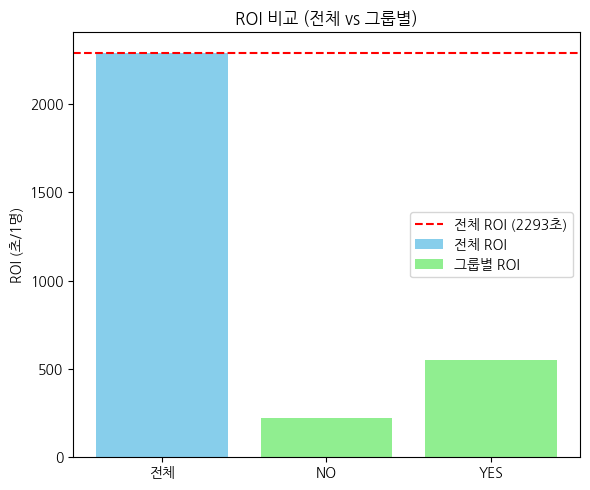

In [ ]:
import matplotlib.pyplot as plt

# ROI 값 (예시)
roi_total = 2292.72
roi_groups = {"NO": 220.84, "YES": 553.19}

# 막대 그래프
plt.figure(figsize=(6,5))
plt.bar(["전체"], [roi_total], color="skyblue", label="전체 ROI")
plt.bar(roi_groups.keys(), roi_groups.values(), color="lightgreen", label="그룹별 ROI")

# 전체 ROI 기준선
plt.axhline(y=roi_total, color="red", linestyle="--", label=f"전체 ROI ({roi_total:.0f}초)")

plt.ylabel("ROI (초/1명)")
plt.title("ROI 비교 (전체 vs 그룹별)")
plt.legend()
plt.tight_layout()
plt.show()


# 데이터 전처리

나이에 대하여 예금 가입 여부와의 관계 확인

In [ ]:
import numpy as np
import pandas as pd

# 사본
df = df.copy()

# 숫자형 변환
df["나이"] = pd.to_numeric(df["나이"], errors="coerce")
df = df.dropna(subset=["나이"])

# 예금가입(이진화)
df["예금가입"] = df["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

# 나이(개별 값)별 가입 비율
age_rate_all = (
    df.groupby("나이", as_index=False)
      .agg(인원수=("예금가입", "size"),
           가입수=("예금가입", "sum"))
)
age_rate_all["가입률(%)"] = (age_rate_all["가입수"] / age_rate_all["인원수"] * 100).round(2)
age_rate_all = age_rate_all.sort_values("나이").reset_index(drop=True)

age_rate_all


,나이,인원수,가입수,가입률(%)
0,17,5,2,40.00
1,18,28,12,42.86
2,19,42,20,47.62
3,20,65,23,35.38
4,21,102,29,28.43
...,...,...,...,...
73,91,2,0,0.00
74,92,4,3,75.00
75,94,1,0,0.00
76,95,1,0,0.00


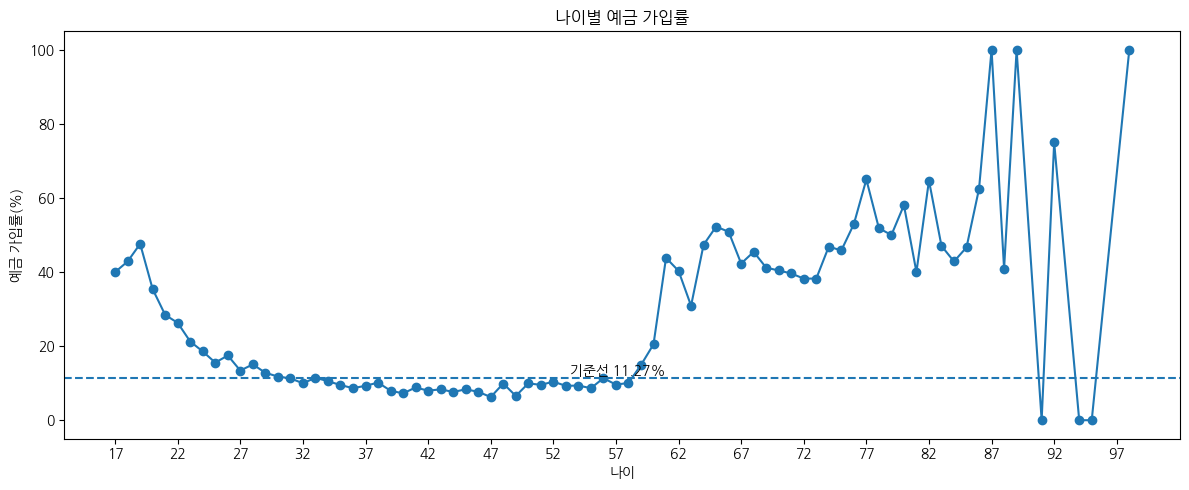

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 사본
df = df.copy()

# 숫자형 변환 및 이진화
df["나이"] = pd.to_numeric(df["나이"], errors="coerce")
df = df.dropna(subset=["나이"])
df["예금가입"] = df["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

# 나이(개별 값)별 가입 비율
age_rate_all = (
    df.groupby("나이", as_index=False)
      .agg(인원수=("예금가입", "size"),
           가입수=("예금가입", "sum"))
)
age_rate_all["가입률(%)"] = (age_rate_all["가입수"] / age_rate_all["인원수"] * 100).round(2)
age_rate_all = age_rate_all.sort_values("나이").reset_index(drop=True)

# 시각화 (기준선 11.27%)
x = age_rate_all["나이"].astype(int)
y = age_rate_all["가입률(%)"]

plt.figure(figsize=(12,5))
plt.plot(x, y, marker="o")
plt.axhline(11.27, linestyle="--")
plt.text(int((x.min()+x.max())/2), 11.27, " 기준선 11.27%", ha="center", va="bottom")
plt.xlabel("나이")
plt.ylabel("예금 가입률(%)")
plt.title("나이별 예금 가입률")
plt.xticks(np.arange(x.min(), x.max()+1, 5))
plt.tight_layout()
plt.show()


* 그래프를 확인해보면 전체 평균 11.27% 중 예금 가입율이 평균보다 높은 연령대가 어떤 연령대인 지 확인을 진행

In [ ]:
mask = (age_rate_all["나이"] <= 40)
age_rate = age_rate_all.loc[mask, ["나이", "인원수", "가입수", "가입률(%)"]].reset_index(drop=True)
age_rate


,나이,인원수,가입수,가입률(%)
0,17,5,2,40.00
1,18,28,12,42.86
2,19,42,20,47.62
3,20,65,23,35.38
4,21,102,29,28.43
5,22,137,36,26.28
6,23,226,48,21.24
7,24,463,86,18.57
8,25,598,93,15.55
9,26,698,122,17.48


In [ ]:
mask = (age_rate_all["나이"] >=50)
age_rate = age_rate_all.loc[mask, ["나이", "인원수", "가입수", "가입률(%)"]].reset_index(drop=True)
age_rate


,나이,인원수,가입수,가입률(%)
0,50,875,87,9.94
1,51,754,72,9.55
2,52,779,81,10.40
3,53,733,68,9.28
4,54,684,64,9.36
5,55,648,56,8.64
6,56,704,80,11.36
7,57,646,62,9.60
8,58,576,58,10.07
9,59,463,69,14.90


* 시각화와 가입율을 직접 보았을 때, 31세 이하, 59세 이상이 평균보다 높은 가입율인 것을 확인할 수 있음

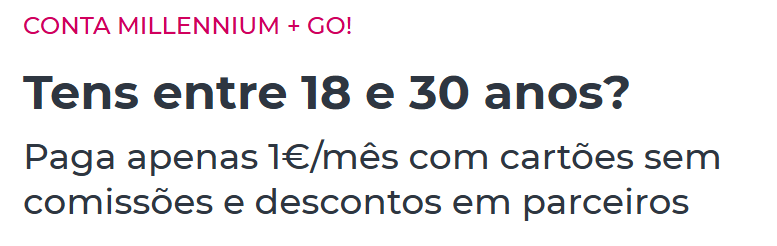

https://www.millenniumbcp.pt/contas/conta-a-ordem/conta-millennium-go


Millennium bcp 은행의 청년 전용 입출금 계좌 'Conta Millennium + GO! 의 공식 페이지로, 18 ~30세인가요? 라는 뜻으로, "월 1유로, 카드 수수료 없음"과 같은 안내를 나타냄.

다음과 같은 근거로, 지금 사용하는 포루투칼의 데이터에서 청년의 기준을 30세로 설정하고, 기준을 설정



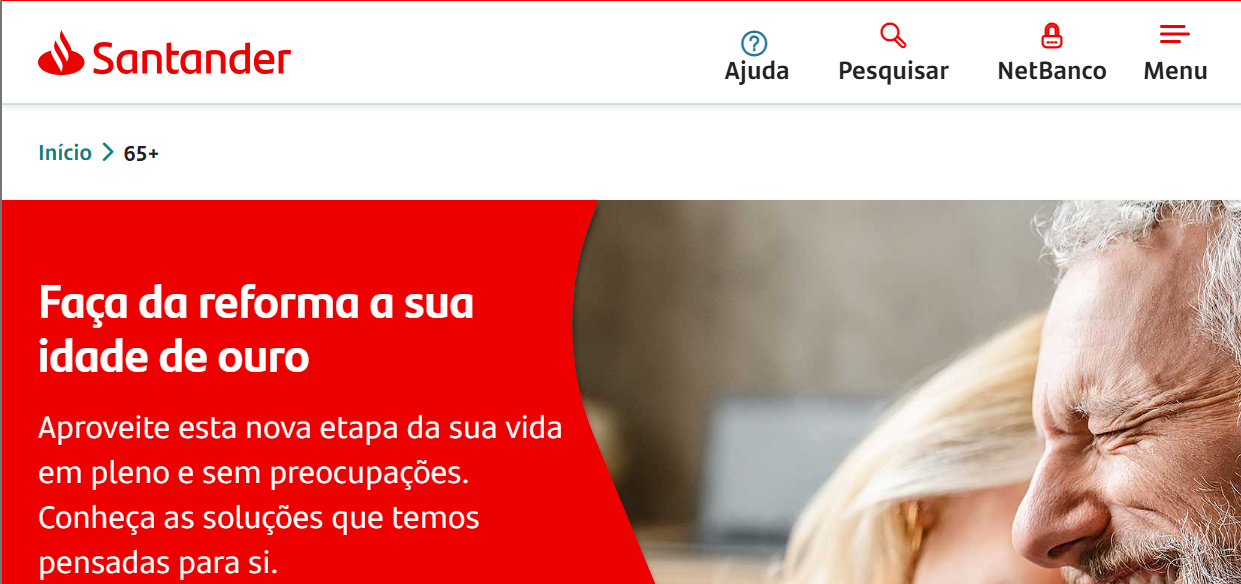

https://www.santander.pt/particulares/65-mais

Banco Santa Totta(산탄데르 포르투칼)의 공식 페이지에 있는 시니어 고객 전용 섹션으로(65+)으로 되ㅓ어 있기에,
우리의 분석에서도 65세 이상의 고객을 기준으로 분류를 진행함

직업에 대하여 예금 가입 여부와 관계 확인

In [ ]:
# 직업을 알 수 없는 데이터인 unknown을 제거
df_job = df.copy()
df_job = df[(df['직업']!='unknown')]

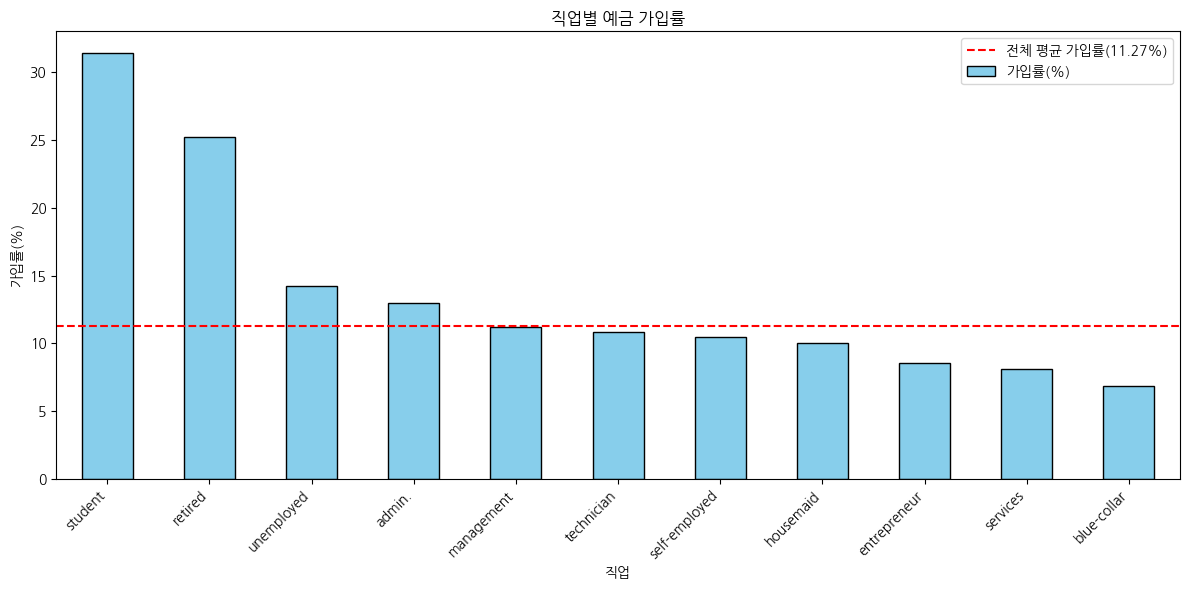

In [ ]:
import matplotlib.pyplot as plt

# 직업별 가입률 계산
job_rate = (
    df_job.groupby("직업", observed=True)
      .agg(인원수=("예금가입", "size"),
           가입수=("예금가입", "sum"))
)
job_rate["가입률(%)"] = (job_rate["가입수"] / job_rate["인원수"] * 100).round(2)

# 시각화
plt.figure(figsize=(12,6))
job_rate["가입률(%)"].sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")

# 전체 평균 가입률 표시 (빨간 점선)
plt.axhline(df["예금가입"].mean()*100, color="red", linestyle="--", label="전체 평균 가입률(11.27%)")

plt.title("직업별 예금 가입률")
plt.xlabel("직업")
plt.ylabel("가입률(%)")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


* 위의 직업 X 예금 가입율을 확인하는 시각화를 통해, student, retired, unemployed, admin의 직업이 11.27%의 평균 이상으로 나타남

* student와 retired가 높은 값을 나타낸 것이 30세 이하, 65세 이상의 나이대가 높은 비율을 나타내는 것이 직업과 연관성이 있을 것이라고 생각(주관)



이전 캠페인 성공 횟수와 예금 가입 여부의 관계 확인

       이전캠페인결과  count   sum      mean  가입률(%)
0      failure   4252   605  0.142286   14.23
1  nonexistent  35563  3141  0.088322    8.83
2      success   1373   894  0.651129   65.11


/tmp/ipython-input-2815794313.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="이전캠페인결과",
/tmp/ipython-input-2815794313.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="이전캠페인결과",


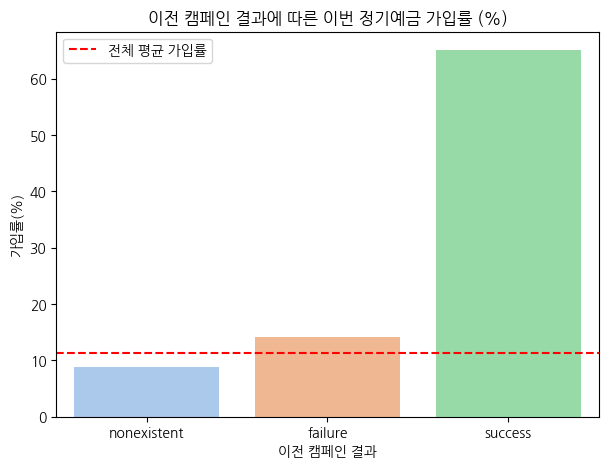

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예금가입 이진화
df["예금가입"] = df["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

# 1) 그룹별 가입률 계산
poutcome_rate = (
    df.groupby("이전캠페인결과")["예금가입"]
      .agg(["count", "sum", "mean"])
      .reset_index()
)
poutcome_rate["가입률(%)"] = (poutcome_rate["mean"] * 100).round(2)
print(poutcome_rate)

# 2) 시각화 (퍼센트로)
plt.figure(figsize=(7,5))
sns.barplot(x="이전캠페인결과",
            y="예금가입",
            data=df,
            estimator=lambda x: sum(x)/len(x)*100,
            ci=None,
            palette="pastel")

# 전체 평균 가입률 표시
plt.axhline(df["예금가입"].mean()*100,
            color="red", linestyle="--", label="전체 평균 가입률")

plt.title("이전 캠페인 결과에 따른 이번 정기예금 가입률 (%)")
plt.ylabel("가입률(%)")
plt.xlabel("이전 캠페인 결과")
plt.legend()
plt.show()


* failure(이전 실패 경험 고객)
  * 가입률 14.23%
  * 전체 평균보다 약간 높음

* nonexistent(이전 캠페인 접촉 없음)
  * 가입율 8.83%
  * 전체 평균보다 낮음

* success(이전 캠페인 성공 경험 고객)
  * 가입률 65.11%
  * 압도적으로 높은 비율로, 전체 평균보다 약 6배 나타남

최종(주관)]
* success 그룹을 통해 재가입 타겟팅이 최우선이 되어야 한다 (가장의 높은 효율)
* failure 그룹에서는 과거에 실패했던 경우 다시 캠페인에 대한 연락을 하였을 때, 전체 평균보다 높은 비율로 정기 예금에 가입하였기에, 맞춤형 방향으로 설득하는 방향으로 진행
* nonexistent 그룹에 대해서는 기대 효과가 낮기에, 새로운 신규 고객을 유입시키기에는 텔레마케팅이 적합하지 않을 것이라고 판단

## 위의 세가지 시각화와 분석을 통해 알게 된 내용을 기반으로 데이터 해석

30세 이하의 그룹 직업별, 가입 비율 확인

In [ ]:
# 직업을 알 수 없는 데이터인 unknown을 제거
df_job = df.copy()
df_job = df[(df['직업']!='unknown')]

/tmp/ipython-input-1212640066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job["예금가입"] = df_job["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)
/tmp/ipython-input-1212640066.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_stats.index, y=job_stats["가입률(%)"], palette="pastel")


               데이터수  가입수  가입률(%)
직업                              
admin.         2146  368   17.15
blue-collar    1491  121    8.12
entrepreneur    138   14   10.14
housemaid        59    5    8.47
management      266   39   14.66
retired           5    0    0.00
self-employed   260   40   15.38
services        915   91    9.95
student         736  244   33.15
technician     1165  158   13.56
unemployed      169   35   20.71


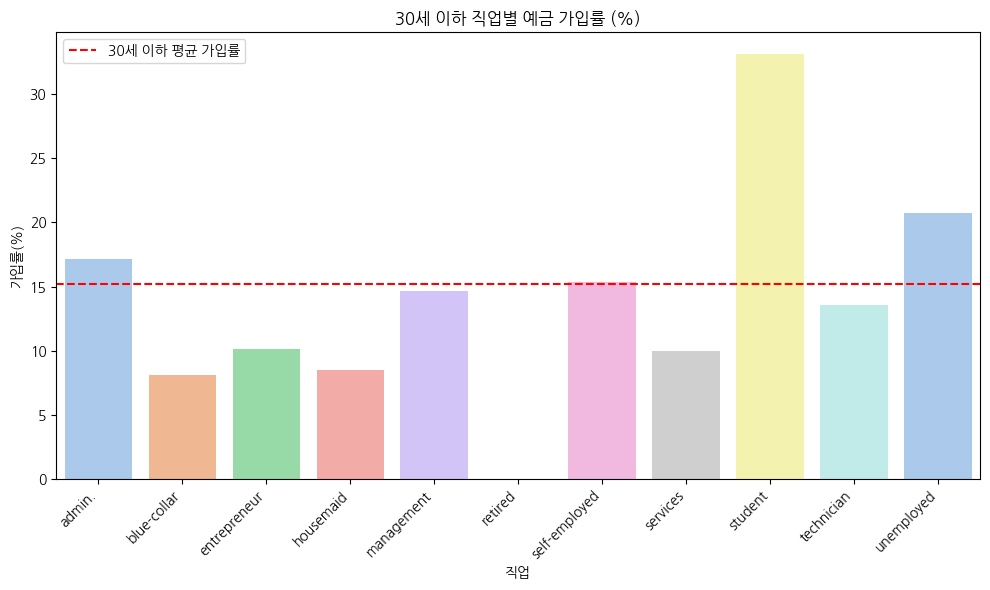

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예금가입 이진화
df_job["예금가입"] = df_job["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

# 30세 이하 데이터 필터링
df_under30 = df_job[df_job["나이"] <= 30]

# 직업별 가입률 및 데이터 개수 계산
job_stats = (
    df_under30.groupby("직업", observed=True)
    .agg(데이터수=("예금가입", "size"),
         가입수=("예금가입", "sum"))
)
job_stats["가입률(%)"] = (job_stats["가입수"] / job_stats["데이터수"] * 100).round(2)
print(job_stats)

# 30세 이하 평균 가입률
avg_rate_under30 = df_under30["예금가입"].mean() * 100

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=job_stats.index, y=job_stats["가입률(%)"], palette="pastel")

# 평균선 표시
plt.axhline(avg_rate_under30, color="red", linestyle="--", label="30세 이하 평균 가입률")

plt.title("30세 이하 직업별 예금 가입률 (%)")
plt.xlabel("직업")
plt.ylabel("가입률(%)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


* student의 경우가 33% 이상으로 다른 직업군 대비 월등히 높은 것을 확인할 수 있다 -> 30세 이하 고객 중 정기 예금 상품의 핵심 타겟으로 사용할 수 있을 것이라고 판단하였다
*retired : 직업을 가졌다가 은퇴를 하게 되는 경우인데, 30세 이하로 나이가 어리기에 은퇴를 하는 경우는 드물게 나타나고, 잘못된 데이터일수도 있으며, 실제로 0% 수치로 가입자가 존재하지 않는다

* 무의미한 데이터
   * unknown : 해당 사람의 직업을 알 수 없기에 제거

65세 이상의 그룹 직업별, 가입 비율 확인

In [ ]:
# 직업을 알 수 없는 데이터인 unknown을 제거
df_job = df.copy()
df_job = df[(df['직업']!='unknown')]

/tmp/ipython-input-2053023426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job["예금가입"] = df_job["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)
/tmp/ipython-input-2053023426.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_stats_over65.index, y=job_stats_over65["가입률(%)"], palette="pastel")


               데이터수  가입수  가입률(%)
직업                              
admin.           17    8   47.06
blue-collar       5    2   40.00
entrepreneur      4    2   50.00
housemaid        38   18   47.37
management       14    9   64.29
retired         560  264   47.14
self-employed     3    0    0.00
services          1    0    0.00
technician        7    2   28.57
unemployed        3    1   33.33


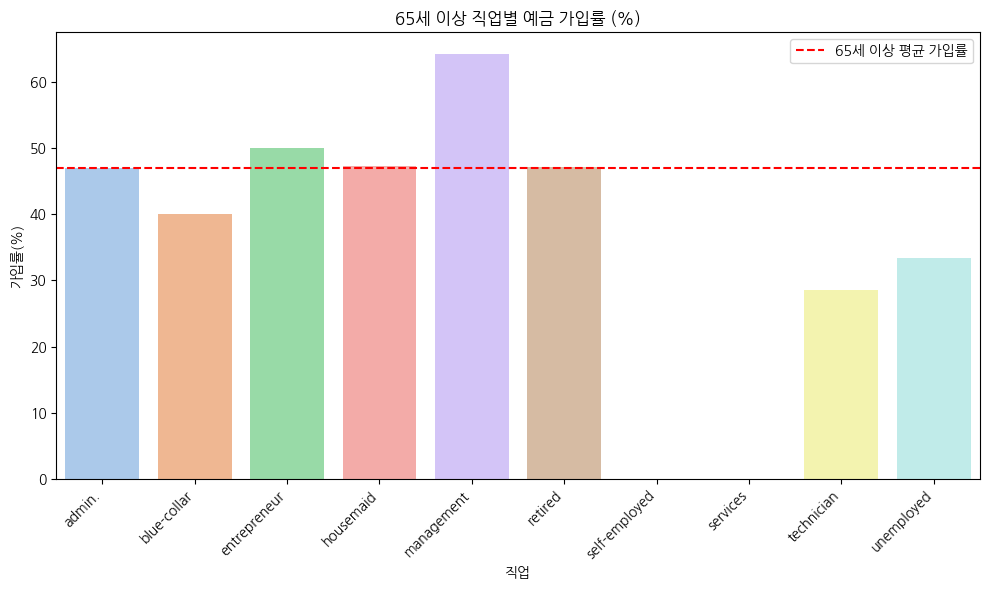

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예금가입 이진화
df_job["예금가입"] = df_job["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

# 65세 이상 데이터 필터링
df_over65 = df_job[df_job["나이"] >= 65]

# 직업별 가입률 및 데이터 개수 계산
job_stats_over65 = (
    df_over65.groupby("직업", observed=True)
    .agg(데이터수=("예금가입", "size"),
         가입수=("예금가입", "sum"))
)
job_stats_over65["가입률(%)"] = (job_stats_over65["가입수"] / job_stats_over65["데이터수"] * 100).round(2)
print(job_stats_over65)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=job_stats_over65.index, y=job_stats_over65["가입률(%)"], palette="pastel")

# 전체 평균 가입률 (빨간 점선)
plt.axhline(df_over65["예금가입"].mean()*100, color="red", linestyle="--", label="65세 이상 평균 가입률")

plt.title("65세 이상 직업별 예금 가입률 (%)")
plt.xlabel("직업")
plt.ylabel("가입률(%)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


* 전체 평균 가입율이 약 47~48% 사이로 나타남
  * retired의 경우가  65세 이상의 대부분을 차지하기 때문에, retired에 가입율이 거의 평균의 값으로 나타나게 된다.

* 가입율이 높은 직업군들이 존재하고, 아닌 직업군들이 존재하지만, 대부분의 데이터들이 retired이며, 이 값이 전체 데이터의 평균 11.27%보다 약 4배 높게 나타나기 때문에, 65세 이상에 대해서는 retired에 초점을 맞추어서 진행한다.(주관)

### 마지막통화시간(초)에 대한 데이터 확인 - feature importance가 높음

가입자 vs 미가입자의 통화시간 분포 비교

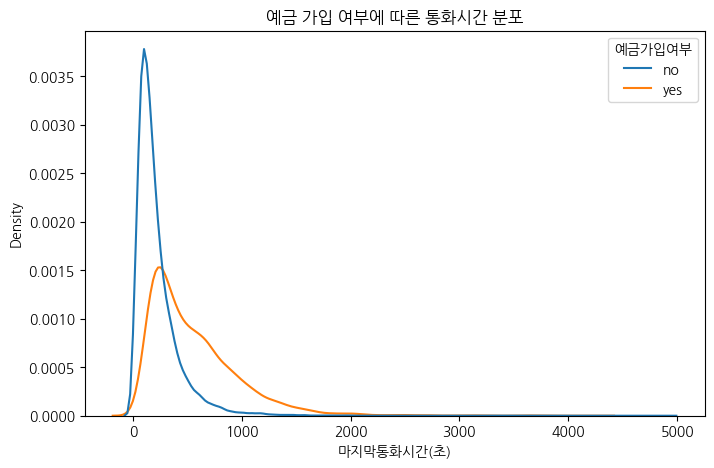

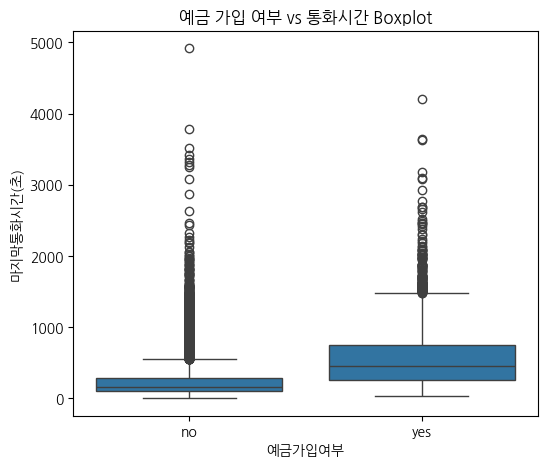

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="마지막통화시간(초)", hue="예금가입여부", common_norm=False)
plt.title("예금 가입 여부에 따른 통화시간 분포")
plt.show()

# Boxplot으로 비교
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="예금가입여부", y="마지막통화시간(초)")
plt.title("예금 가입 여부 vs 통화시간 Boxplot")
plt.show()


* Density Plot(KDE Plot)
  * x축 : 마지막 통화 시간(초)
  * y축 전체 확률이 1이 되도록 정규화된 밀도

* 예금 미가입자
  * 통화시간이 대부분 0~300초 근처에 몰려 있다
  * density 곡선이 뾰족하게 솟아 있다 -> 짧은 시간에 거절하는 경우가 많다

* 예금 가입자
  * 밀도 곡선이 오른쪽으로 더 퍼져있다
  * 통화 시간이 길어질수록 가입 확율이 높아진다

* Boxplot으로 본 차이
  * 예금 가입자 그룹(yes)의 중앙값이 미가입자보다 뚜렷하게 높다
  * IQR도 크고, 아웃라이어도 더 많다 가입자는 평균적으로 더 오래 통화한다

통화시간에 따른 가입률(%)

=== 구간별 상세 통계 ===
예금가입여부           no   yes   데이터수  가입률(%)
통화시간구간                                  
(0, 100]       9942    81  10023    0.81
(100, 200]    12094   639  12733    5.02
(200, 300]     6426   798   7224   11.05
(300, 400]     3460   580   4040   14.36
(400, 500]     1792   444   2236   19.86
(500, 1000]    2440  1532   3972   38.57
(1000, 5000]    390   566    956   59.21


/tmp/ipython-input-3309458629.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("통화시간구간")["예금가입여부"]


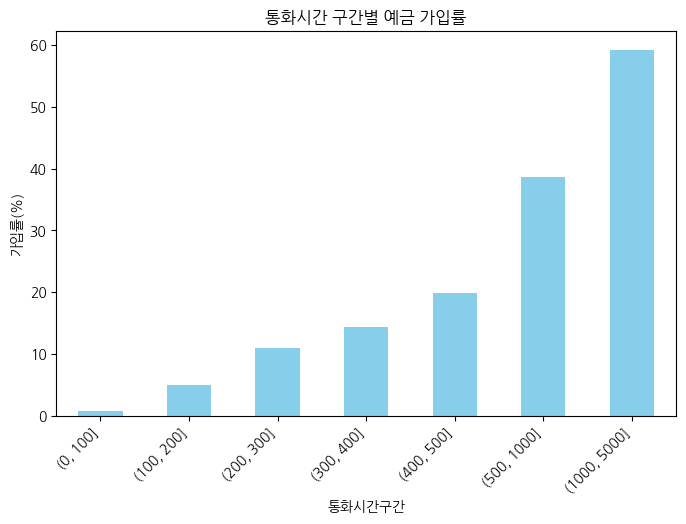

In [ ]:
import matplotlib.pyplot as plt

# 1) 통화시간 구간 나누기
df["통화시간구간"] = pd.cut(df["마지막통화시간(초)"], bins=[0,100,200,300,400,500,1000,5000])

# 2) 구간별 집계 (no/yes 개수, 데이터수, 가입률)
summary = (
    df.groupby("통화시간구간")["예금가입여부"]
      .value_counts()
      .unstack(fill_value=0)  # no/yes 개수
)

summary["데이터수"] = summary.sum(axis=1)
summary["가입률(%)"] = (summary["yes"] / summary["데이터수"] * 100).round(2)

print("=== 구간별 상세 통계 ===")
print(summary)

# 3) 가입률만 추출해서 시각화
plt.figure(figsize=(8,5))
summary["가입률(%)"].plot(kind="bar", color="skyblue")
plt.ylabel("가입률(%)")
plt.title("통화시간 구간별 예금 가입률")
plt.xticks(rotation=45, ha="right")
plt.show()


* 통화 시간의 구간별로 가입률을 확인하였으며, 통화시간이 길어질수록 가입률이 높아지고 있음을 확인하였다

가입자 1명을 얻는 데 평균적으로 몇 초의 통화시간이 필요한가?

/tmp/ipython-input-556578058.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("통화시간구간")


=== 구간별 상세 통계 ===
                 건수  YES수    총통화시간       평균통화시간  가입률(%)  1명가입당_평균소요시간(초)
통화시간구간                                                                  
(0, 100]      10023    81   616848    61.543251    0.81          7615.41
(100, 200]    12733   639  1871475   146.978324    5.02          2928.76
(200, 300]     7224   798  1771147   245.175388   11.05          2219.48
(300, 400]     4040   580  1399029   346.294307   14.36          2412.12
(400, 500]     2236   444   998232   446.436494   19.86          2248.27
(500, 1000]    3972  1532  2687414   676.589627   38.57          1754.19
(1000, 5000]    956   566  1294098  1353.658996   59.21          2286.39


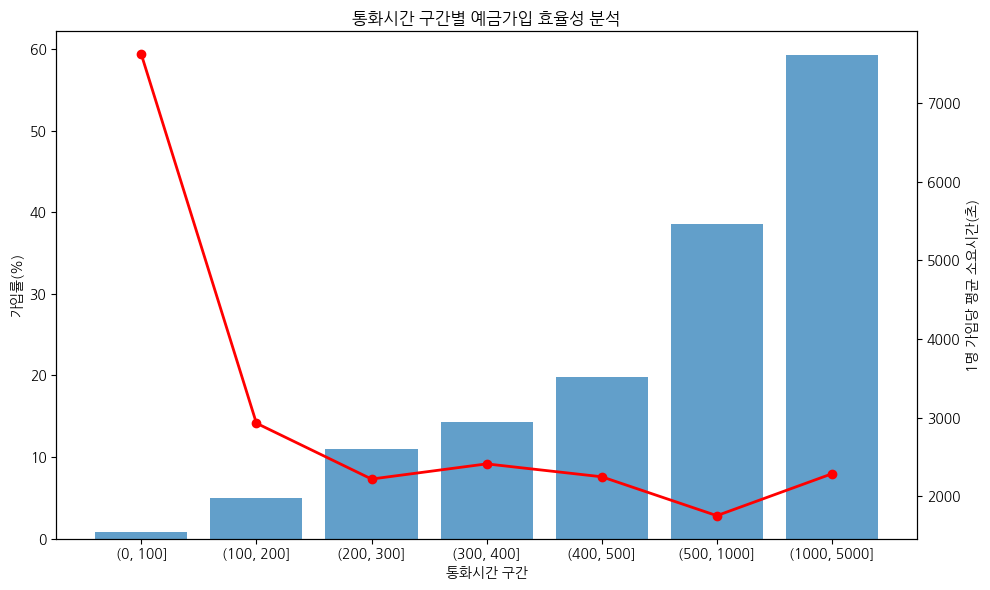

In [ ]:
import matplotlib.pyplot as plt

# 1) 통화시간 구간 나누기
df["통화시간구간"] = pd.cut(df["마지막통화시간(초)"],
                        bins=[0,100,200,300,400,500,1000,5000])

# 2) 구간별 집계
agg = (
    df.groupby("통화시간구간")
      .agg(
          건수=("예금가입여부", "count"),
          YES수=("예금가입여부", lambda x: (x=="yes").sum()),
          총통화시간=("마지막통화시간(초)", "sum"),
          평균통화시간=("마지막통화시간(초)", "mean")
      )
)

# 3) 효율성 지표 추가
agg["가입률(%)"] = (agg["YES수"] / agg["건수"] * 100).round(2)
agg["1명가입당_평균소요시간(초)"] = (agg["총통화시간"] / agg["YES수"]).round(2)

print("=== 구간별 상세 통계 ===")
print(agg)

# 4) 시각화 (2축 그래프: 가입률과 1명당 소요시간)
fig, ax1 = plt.subplots(figsize=(10,6))

# (a) 가입률 bar chart
ax1.set_xlabel("통화시간 구간")
ax1.set_ylabel("가입률(%)")
ax1.bar(agg.index.astype(str), agg["가입률(%)"], alpha=0.7)
ax1.tick_params(axis='y')

# (b) 1명 가입당 소요시간 line chart
ax2 = ax1.twinx()
ax2.set_ylabel("1명 가입당 평균 소요시간(초)")
ax2.plot(agg.index.astype(str), agg["1명가입당_평균소요시간(초)"],
         color='red',marker='o', linewidth=2)
ax2.tick_params(axis='y')

plt.title("통화시간 구간별 예금가입 효율성 분석")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


* 0초 ~ 100초 구간
  * 가입율은 0,8%로 낮으며, 1명을 가입시키려면 7615초(2시간 이상) 투자해야 한다.
* 100초 ~ 200초 구간
  * 가입율은 5%로 효율도가 낮으며, 가입 한 건당 50분 가까이 소요된다.
* 200초 ~ 500초 구간
  * 가입율이 11~20% 사이로, 증가하고 있다.
  * 건 당 효율 시간이 점점 안정을 찾기 시작함
* 500~1000초 구간
  * 가입율이 38.6%로 크게 상승하였다.
  * 가입 한 건당 소요시간은 약 30분으로 가장 효율적인 구간으로 나타났다
* 1000~5000초 구간
  * 가입율은 59%로 가장 높게 나타났다
  * 평균 통화시간이 길기에, 한 건 확보에 38분 필요
  * 효율이 500~1000초 구간보다 떨어진다

최종]
500초에서 1000초 구간이 효율이 가장 높게 나타났다.


500~1000초 안에서 가입자와 비가입자가 어떻게 분포하는 지 확인

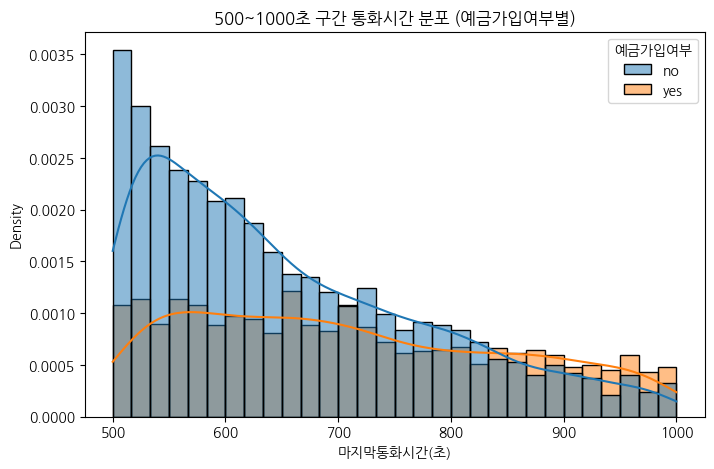

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 500~1000초 구간 데이터 추출
df_range = df[(df["마지막통화시간(초)"] >= 500) & (df["마지막통화시간(초)"] <= 1000)]

plt.figure(figsize=(8,5))
sns.histplot(data=df_range, x="마지막통화시간(초)", hue="예금가입여부", bins=30, kde=True, stat="density")
plt.title("500~1000초 구간 통화시간 분포 (예금가입여부별)")
plt.show()


# 가설1에 대한 통계 검증

카이제곱 검증을 통한 통계 검증(연령대 X 예금가입여부)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, chisquare

# ------------------------
# 1) 연령대 구간화
# ------------------------
bins = [0, 29, 39, 49, 59, 150]
labels = ["20대 이하", "30대", "40대", "50대", "60대 이상"]
df["연령대"] = pd.cut(df["나이"], bins=bins, labels=labels, right=True, include_lowest=True)

# ------------------------
# 2) 예금가입 (이진화)
# ------------------------
df["예금가입"] = df["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

# ------------------------
# 3) 카이제곱 적합성 검정 (Goodness-of-Fit)
#    - 가설: 연령대별 가입자 수가 동일하다
# ------------------------
obs = df[df["예금가입"] == 1]["연령대"].value_counts().sort_index()
exp = [obs.sum() / len(obs)] * len(obs)   # 기대값: 모든 연령대 동일
chi2_gof, p_gof = chisquare(obs, f_exp=exp)
print("=== 카이제곱 적합성 검정 ===")
print("Chi2:", chi2_gof, "p-value:", p_gof)
print()

# ------------------------
# 4) 카이제곱 독립성 검정 (Independence)
#    - 가설: 연령대와 예금가입 여부는 독립이다
# ------------------------
contingency = pd.crosstab(df["연령대"], df["예금가입"])
chi2_ind, p_ind, dof_ind, exp_ind = chi2_contingency(contingency)
print("=== 카이제곱 독립성 검정 ===")
print("Chi2:", chi2_ind, "p-value:", p_ind, "자유도:", dof_ind)
print("\n기대빈도표:\n", exp_ind)
print()

# ------------------------
# 5) 카이제곱 동질성 검정 (Homogeneity)
#    - 가설: 각 연령대별로 '가입여부 분포'가 동일하다
#    (구조는 독립성 검정과 동일, 해석만 다름)
# ------------------------
# 독립성 검정과 동일한 교차표 사용
chi2_hom, p_hom, dof_hom, exp_hom = chi2_contingency(contingency)
print("=== 카이제곱 동질성 검정 ===")
print("Chi2:", chi2_hom, "p-value:", p_hom, "자유도:", dof_hom)


=== 카이제곱 적합성 검정 ===
Chi2: 958.5538793103448 p-value: 3.421066678493212e-206

=== 카이제곱 독립성 검정 ===
Chi2: 1245.4954769418246 p-value: 2.183245372697046e-268 자유도: 4

기대빈도표:
 [[ 5030.36350393   638.63649607]
 [15029.86364961  1908.13635039]
 [ 9340.20219481  1185.79780519]
 [ 6088.96707779   773.03292221]
 [ 1058.60357386   134.39642614]]

=== 카이제곱 동질성 검정 ===
Chi2: 1245.4954769418246 p-value: 2.183245372697046e-268 자유도: 4


카이

* 카이제곱 적합성 검정
  * 귀무가설(H0) : 연령대별 예금 가입자가 균등하게 분포
  * 결과 p-value << 0.05로 귀무가설을 기각
  * 연령대별 예금 가입자 수는 동일하지 않고, 어떤 연령대는 많이 가입하고 어떤 연령대는 적게 가입하는 경향이 있다

 * 카이제곱 독립성 검정
   * 귀무가설(H0) : 연령대와 예금가입 여부는 서로 독립
   * 결과 p-value << 0.05로 귀무가설을 기각
   * 연령대와 예금 가입 여부는 독립이 아니고, 연관성이 있다

* 카이제곱 동질성 검정
  * 귀무가설(H0) ; 모든 연령대에서 예금가입 분포가 동일하다
  * 결과 p-value << 0.05로 귀무가설 기각
  * 연령대 집단마다 예금가입 비율 분포가 다르다

 최종]

 * 연령대를 통해 예금 가입률에 유의한 영향을 줌

# 가설2에 대한 통계 검증

카이제곱 검증을 통한 통계 검증(직업 X 예금가입여부)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, chisquare

# ------------------------
# 1) 데이터 준비
# ------------------------
# 예금가입 이진화
df["예금가입"] = df["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

# 직업 × 가입여부 교차표
contingency_job = pd.crosstab(df["직업"], df["예금가입"])

# ------------------------
# 2) 적합성 검정 (Goodness-of-Fit)
#    가설: 직업별 예금가입자 수는 동일하다
# ------------------------
obs = df[df["예금가입"] == 1]["직업"].value_counts().sort_index()
exp = [obs.sum() / len(obs)] * len(obs)   # 모든 직업에 동일 비율 기대
chi2_gof, p_gof = chisquare(obs, f_exp=exp)

print("=== 카이제곱 적합성 검정 ===")
print("Chi2:", chi2_gof, "p-value:", p_gof)
print()

# ------------------------
# 3) 독립성 검정 (Test of Independence)
#    가설: 직업과 예금가입 여부는 서로 독립이다
# ------------------------
chi2_ind, p_ind, dof_ind, exp_ind = chi2_contingency(contingency_job)
print("=== 카이제곱 독립성 검정 ===")
print("Chi2:", chi2_ind, "p-value:", p_ind, "자유도:", dof_ind)
print("\n기대빈도표:\n", exp_ind)
print()

# ------------------------
# 4) 동질성 검정 (Test of Homogeneity)
#    가설: 모든 직업 집단에서 예금가입 분포(yes/no)가 동일하다
#    → 실제로는 독립성 검정과 같은 교차표 사용
# ------------------------
chi2_hom, p_hom, dof_hom, exp_hom = chi2_contingency(contingency_job)
print("=== 카이제곱 동질성 검정 ===")
print("Chi2:", chi2_hom, "p-value:", p_hom, "자유도:", dof_hom)


=== 카이제곱 적합성 검정 ===
Chi2: 3932.396551724137 p-value: 0.0

=== 카이제곱 독립성 검정 ===
Chi2: 961.2424403289555 p-value: 4.189763287563623e-199 자유도: 11

기대빈도표:
 [[9247.91822861 1174.08177139]
 [8211.49830048 1042.50169952]
 [1291.97552685  164.02447315]
 [ 940.58657862  119.41342138]
 [2594.59920365  329.40079635]
 [1526.23482568  193.76517432]
 [1260.91842284  160.08157716]
 [3521.87559483  447.12440517]
 [ 776.42760027   98.57239973]
 [5983.37292415  759.62707585]
 [ 899.76867049  114.23132951]
 [ 292.82412353   37.17587647]]

=== 카이제곱 동질성 검정 ===
Chi2: 961.2424403289555 p-value: 4.189763287563623e-199 자유도: 11


* 카이제곱 적합성 검정
  * 귀무가설(H0) : 직업별 예금가입자 수가 고르게 분포한다
  * 결과 p-value << 0.05로, 귀무가설 기각
  * 어떤 직업군에서는 가입자가 많이 몰리고, 어떤 직업군은 매우 적다는 의미

* 카이제곱 독립성 검정
  * 귀무가설(H0) : 직업과 예금가입 여부는 서로 독립이다
  * 결과 p-value << 0.05로 귀무가설 기각
  * 직업과 예금가입 여부는 독립이 아니고, 연관성이 있다

* 카이제곱  동질성 검정
  * 귀무가설(H0) : 모든 직업 집단에서 예금가입 비율 분포가 동일하다
  * 결과 p-value << 0.05로 귀무가설을 기각
  * 직업군마다 예금 가입 비율이 다르다

최종]
 * 직업은 정기예금 가입률에 유의한 영향


# 가설3에 대한 통계 검증

카이제곱을 통한 통계 검증 (이전 가입 여부 X 이번 정기 예금 가입 여부)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 예금가입 이진화
df["예금가입"] = df["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

# 교차표 생성 (이전 캠페인 결과 × 이번 가입 여부)
contingency_poutcome = pd.crosstab(df["이전캠페인결과"], df["예금가입"])
print("교차표:\n", contingency_poutcome)

# 카이제곱 독립성 검정
chi2, p, dof, exp = chi2_contingency(contingency_poutcome)

print("\n=== 카이제곱 독립성 검정 (이전캠페인결과 vs 이번예금가입) ===")
print("Chi2 통계량:", chi2)
print("자유도:", dof)
print("p-value:", p)
print("\n기대빈도표:\n", exp)


교차표:
 예금가입             0     1
이전캠페인결과                 
failure       3647   605
nonexistent  32422  3141
success        479   894

=== 카이제곱 독립성 검정 (이전캠페인결과 vs 이번예금가입) ===
Chi2 통계량: 4230.5237978319765
자유도: 2
p-value: 0.0

기대빈도표:
 [[ 3772.99446441   479.00553559]
 [31556.67971254  4006.32028746]
 [ 1218.32582306   154.67417694]]


* 카이제곱 적합성 검정
  * 귀무가설(H0) : 이전 캠페인 결과별 예금가입자 수가 고르게 분포한다
  * 결과 p-value << 0.05로, 귀무가설 기각
  * 어떤 그룹에서는 가입자가 많이 몰리고, 어떤 그룹에서는 매우 적다는 것을 의미
* 카이제곱 독립성 검정
  * 귀무가설(H0) : 이전 캠페인 결과와 이번 예금가입 여부는 서로 독립이다
  * 결과 p-value << 0.05로, 귀무가설 기각
  * 이전 캠페인 결과와 이번 가입 여부는 독립이 아니고, 유의한 연관성이 있다
  
* 카이제곱 동질성 검정
   * 귀무가설(H0) : 모든 이전 캠페인 결과 그룹에서 예금가입 비율 분포가 동일하다
   * 결과 p-value << 0.05로, 귀무가설 기각
   * 그룹마다 이번 정기예금 가입 비율이 다르다

최종]
 * 이전 캠페인의 결과와 이번 캠페인의 결과는 유의미 하다

# 3개의 가설의 결과 해석


검증한 결과를 통해 세 가지 가설 모두 귀무가설을 채택하여, 연령대,직업, 이전 예금 가입 여부는 이번 정기 예금 가입과 유의미한 관계에 있음을 알 수 있었다.

세 가지 가설을 전처리하고, 시각화, 통계 검정하는 과정에서,
* 연령대에서 평균보다 높게 나타난 구간 중 분석이 유의미하다고 판단한 30세 이하, 65세 이상의 구간이 의미가 있는 결과를 도출하게 할 것이다
* 직업에서 평균보다 높게 나타난 직군 중, 위의 연령에서 뽑아낸 30대 이하와, 65세 이상에서 학생과 은퇴한 사람이 영향이 있을 것이라고 판단하였다
* 이전에 예금을 가입한 경우가 평균보다 약 6배 정도가 많은 것을 확인하여, 이 전 가입자를 우선 타겟팅하여 마케팅을 진행해야 한다는 사실을 알게 되었다

# 3가지 가설에서 확장 통계 검증

30세 이하 데이터셋에 대해 직업과 예금 가입 여부의 카이제곱 검증

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, chisquare

# ------------------------
# 1) 데이터 준비
# ------------------------
# unknown 직업 제거
df_job = df[df['직업'] != 'unknown'].copy()

# 예금가입 이진화
df_job["예금가입"] = df_job["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

# 30세 이하 필터링
df_under30 = df_job[df_job["나이"] <= 30]

# 직업 × 가입여부 교차표
contingency_job_under30 = pd.crosstab(df_under30["직업"], df_under30["예금가입"])
print("교차표:\n", contingency_job_under30)

# ------------------------
# 2) 적합성 검정 (Goodness-of-Fit)
#    가설: 직업별 예금가입자 수는 동일하다
# ------------------------
obs = df_under30[df_under30["예금가입"] == 1]["직업"].value_counts().sort_index()
exp = [obs.sum() / len(obs)] * len(obs)   # 모든 직업 동일 기대치
chi2_gof, p_gof = chisquare(obs, f_exp=exp)

print("\n=== 카이제곱 적합성 검정 (30세 이하, unknown 제거) ===")
print("Chi2:", chi2_gof, "p-value:", p_gof)

# ------------------------
# 3) 독립성 검정 (Test of Independence)
#    가설: 직업과 예금가입 여부는 서로 독립이다
# ------------------------
chi2_ind, p_ind, dof_ind, exp_ind = chi2_contingency(contingency_job_under30)
print("\n=== 카이제곱 독립성 검정 (30세 이하, unknown 제거) ===")
print("Chi2:", chi2_ind, "자유도:", dof_ind, "p-value:", p_ind)
print("\n기대빈도표:\n", exp_ind)

# ------------------------
# 4) 동질성 검정 (Test of Homogeneity)
#    가설: 모든 직업 집단에서 예금가입 분포가 동일하다
# ------------------------
chi2_hom, p_hom, dof_hom, exp_hom = chi2_contingency(contingency_job_under30)
print("\n=== 카이제곱 동질성 검정 (30세 이하, unknown 제거) ===")
print("Chi2:", chi2_hom, "자유도:", dof_hom, "p-value:", p_hom)


교차표:
 예금가입              0    1
직업                      
admin.         1778  368
blue-collar    1370  121
entrepreneur    124   14
housemaid        54    5
management      227   39
retired           5    0
self-employed   220   40
services        824   91
student         492  244
technician     1007  158
unemployed      134   35

=== 카이제곱 적합성 검정 (30세 이하, unknown 제거) ===
Chi2: 1103.95067264574 p-value: 6.516125278993344e-232

=== 카이제곱 독립성 검정 (30세 이하, unknown 제거) ===
Chi2: 280.62514802511544 자유도: 10 p-value: 1.921618015437272e-54

기대빈도표:
 [[1.82045034e+03 3.25549660e+02]
 [1.26481429e+03 2.26185714e+02]
 [1.17065306e+02 2.09346939e+01]
 [5.00496599e+01 8.95034014e+00]
 [2.25647619e+02 4.03523810e+01]
 [4.24149660e+00 7.58503401e-01]
 [2.20557823e+02 3.94421769e+01]
 [7.76193878e+02 1.38806122e+02]
 [6.24348299e+02 1.11651701e+02]
 [9.88268707e+02 1.76731293e+02]
 [1.43362585e+02 2.56374150e+01]]

=== 카이제곱 동질성 검정 (30세 이하, unknown 제거) ===
Chi2: 280.62514802511544 자유도: 10 p-value: 1.9216180

* 카이제곱 적합성 검정
  * 귀무가설(H0) : 직업별 예금가입자 수가 고르게 분포한다
  * 결과 p-value << 0.05로 귀무가설 기각
  * 30세 이하 집단에서도 직업별 가입자수는 균등하지 않고, 어떤 직업군에서는 가입자가 많이 몰리고, 어떤 직업군은 매우 적다

* 카이제곱 독립성 검정
  * 귀무가설(H0) : 직업과 예금가입 여부는 서로 독립이다
  * 결과 p-value << 0.05로 귀무가설 기각
  * 직업과 예금가입 여부는 독립이 아니며, 30세 이하에서도 두 변수는 유의하게 연관성이 있음

* 카이제곱 동질성 검정
  * 귀무가설(H0) : 모든 직업 집단에서 예금가입 비율 분포가 동일하다
  * 결과 p-value << 0.05로 귀무가설 기각
  * 직업군마다 예금 가입 비율이 다르며, 일부 직군은 다른 집단 대비 가입 비율이 월등히 높음

최종]
 * 30세 이하의 연령에서도 직업과 정기 예금 가입 여부가 유의미한 통계이다

30세 이하 데이터셋에 대해 직업과 예금 가입 여부의 카이제곱 검증

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, chisquare

# ------------------------
# 1) 데이터 준비
# ------------------------
# unknown 직업 제거
df_job = df[df['직업'] != 'unknown'].copy()

# 예금가입 이진화
df_job["예금가입"] = df_job["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

# 65세 이상 필터링
df_over65 = df_job[df_job["나이"] >= 65]

# 직업 × 가입여부 교차표
contingency_job_over65 = pd.crosstab(df_over65["직업"], df_over65["예금가입"])
print("교차표:\n", contingency_job_over65)

# ------------------------
# 2) 적합성 검정 (Goodness-of-Fit)
#    가설: 직업별 예금가입자 수는 동일하다
# ------------------------
obs = df_over65[df_over65["예금가입"] == 1]["직업"].value_counts().sort_index()
exp = [obs.sum() / len(obs)] * len(obs)   # 모든 직업 동일 기대치
chi2_gof, p_gof = chisquare(obs, f_exp=exp)

print("\n=== 카이제곱 적합성 검정 (65세 이상, unknown 제거) ===")
print("Chi2:", chi2_gof, "p-value:", p_gof)

# ------------------------
# 3) 독립성 검정 (Test of Independence)
#    가설: 직업과 예금가입 여부는 서로 독립이다
# ------------------------
chi2_ind, p_ind, dof_ind, exp_ind = chi2_contingency(contingency_job_over65)
print("\n=== 카이제곱 독립성 검정 (65세 이상, unknown 제거) ===")
print("Chi2:", chi2_ind, "자유도:", dof_ind, "p-value:", p_ind)
print("\n기대빈도표:\n", exp_ind)

# ------------------------
# 4) 동질성 검정 (Test of Homogeneity)
#    가설: 모든 직업 집단에서 예금가입 분포가 동일하다
# ------------------------
chi2_hom, p_hom, dof_hom, exp_hom = chi2_contingency(contingency_job_over65)
print("\n=== 카이제곱 동질성 검정 (65세 이상, unknown 제거) ===")
print("Chi2:", chi2_hom, "자유도:", dof_hom, "p-value:", p_hom)


교차표:
 예금가입             0    1
직업                     
admin.           9    8
blue-collar      3    2
entrepreneur     2    2
housemaid       20   18
management       5    9
retired        296  264
self-employed    3    0
services         1    0
technician       5    2
unemployed       2    1

=== 카이제곱 적합성 검정 (65세 이상, unknown 제거) ===
Chi2: 1528.7189542483657 p-value: 0.0

=== 카이제곱 독립성 검정 (65세 이상, unknown 제거) ===
Chi2: 6.525134349609292 자유도: 9 p-value: 0.686425234422329

기대빈도표:
 [[  9.02147239   7.97852761]
 [  2.65337423   2.34662577]
 [  2.12269939   1.87730061]
 [ 20.16564417  17.83435583]
 [  7.42944785   6.57055215]
 [297.17791411 262.82208589]
 [  1.59202454   1.40797546]
 [  0.53067485   0.46932515]
 [  3.71472393   3.28527607]
 [  1.59202454   1.40797546]]

=== 카이제곱 동질성 검정 (65세 이상, unknown 제거) ===
Chi2: 6.525134349609292 자유도: 9 p-value: 0.686425234422329


* 카이제곱 적합성 검정
  * 귀무가설(H0) : 직업별 예금가입자 수가 고르게 분포한다
  * 결과 p-value << 0.05로 귀무가설 기각
  * 30세 이하 집단에서도 직업별 가입자수는 균등하지 않고, 어떤 직업군에서는 가입자가 많이 몰리고, 어떤 직업군은 매우 적다

* 카이제곱 독립성 검정
  * 귀무가설(H0) : 직업과 예금가입 여부는 서로 독립이다
  * 결과 p-value << 0.05로 귀무가설 기각
  * 직업과 예금가입 여부는 독립이 아니며, 65세 이상에서도 두 변수는 유의하게 연관성이 있음

* 카이제곱 동질성 검정
  * 귀무가설(H0) : 모든 직업 집단에서 예금가입 비율 분포가 동일하다
  * 결과 p-value << 0.05로 귀무가설 기각
  * 직업군마다 예금 가입 비율이 다르며, 일부 직군은 다른 집단 대비 가입 비율이 월등히 높음

최종]
 * 65세 이상의 연령에서도 직업과 정기 예금 가입 여부가 유의미한 통계이다

마지막 통화시간과 예금 가입 여부의 통계 검정

In [ ]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

# -----------------------------
# 0) 데이터 준비
# -----------------------------
yes_time = df[df["예금가입여부"]=="yes"]["마지막통화시간(초)"]
no_time  = df[df["예금가입여부"]=="no"]["마지막통화시간(초)"]

# -----------------------------
# 1) 정규성 검정 (Shapiro-Wilk)
# -----------------------------
# 표본 크기를 데이터 크기와 비교해서 설정
sample_yes = yes_time.sample(n=min(5000, len(yes_time)), random_state=42)
sample_no  = no_time.sample(n=min(5000, len(no_time)), random_state=42)

stat_yes, p_yes = shapiro(sample_yes)
stat_no, p_no   = shapiro(sample_no)

print("=== 정규성 검정 (Shapiro-Wilk) ===")
print(f"가입자(yes) p-value: {p_yes:.5f}")
print(f"비가입자(no) p-value: {p_no:.5f}")

# -----------------------------
# 2) Mann-Whitney U Test (비모수 검정)
# -----------------------------
stat, p = mannwhitneyu(yes_time, no_time, alternative='two-sided')

print("\n=== Mann-Whitney U Test ===")
print("통계량:", stat, "p-value:", p)

# -----------------------------
# 3) 카이제곱 독립성 검정 (통화시간 구간 vs 가입여부)
# -----------------------------
df["통화시간구간"] = pd.cut(df["마지막통화시간(초)"], bins=[0,100,200,300,400,500,1000,5000])

contingency = pd.crosstab(df["통화시간구간"], df["예금가입여부"])
chi2, p, dof, exp = chi2_contingency(contingency)

print("\n=== 카이제곱 독립성 검정 ===")
print("Chi2:", chi2, "자유도:", dof, "p-value:", p)


=== 정규성 검정 (Shapiro-Wilk) ===
가입자(yes) p-value: 0.00000
비가입자(no) p-value: 0.00000

=== Mann-Whitney U Test ===
통계량: 138794276.5 p-value: 0.0

=== 카이제곱 독립성 검정 ===
Chi2: 6957.291339757867 자유도: 6 p-value: 0.0


* 정규성 검정
  * 가입자 p-value < 0.05
  * 비가입자 p-value < 0.05
  * 귀무가설(H0) : 데이터는 정규분포를 따른다
  * p-value << 0.05로, 귀무가설을 기각
  * 통화시간(초)는 가입자/비가입자 모두 정규분포를 따르지 않는다
  -> 비모수 검정을 사용해야 한다
* Mann-Whitney Test(비모수 검정)
  * 통계량 : 138794276.5
  * p-value << 0.05로 귀무가설 기각
  * 예금 가입자와 비가입자의 통화시간 분포에는 유의미한 차이가 있다
* 카이제곱 독립성 검정
  * 귀무가설(H0) : 통화시간 구간과 예금가입 여부는 독립이다
  * 결과 p-value << 0.05로 귀무가설을 기각
  * 통화시간 구간과 예금가입 여부는 서로 연관성이 있다.

최종]
* 통화시간은 예금 가입 여부와 유의미한 관계가 있다

### 최종 시각화

In [ ]:
# 1) 이전 캠페인 참여자만 필터링
df_prev_part = df[df["이전캠페인결과"] == 'success'].copy()

# 2) 조건별 필터링
group1 = df_prev_part[(df_prev_part["나이"] <= 30) & (df_prev_part["직업"] == "student")]
group2 = df_prev_part[(df_prev_part["나이"] >= 65) & (df_prev_part["직업"] == "retired")]

# 3) 가입률 계산
rate1 = (group1["예금가입여부"] == "yes").mean()
rate2 = (group2["예금가입여부"] == "yes").mean()

print(f"30대 이하 학생 (이전 캠페인 참여자) 가입률: {rate1:.3%}")
print(f"65세 이상 은퇴자 (이전 캠페인 참여자) 가입률: {rate2:.3%}")


30대 이하 학생 (이전 캠페인 참여자) 가입률: 70.909%
65세 이상 은퇴자 (이전 캠페인 참여자) 가입률: 77.670%


# 모델링

전체 데이터에 대해 최적의 예측 모델 고르기

In [ ]:
import pandas as pd

df= pd.read_csv('/content/bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df = df.rename(columns={
    "age": "나이",
    "job": "직업",
    "marital": "결혼상태",
    "education": "교육수준",
    "default": "신용불량여부",
    "housing": "주택대출여부",
    "loan": "개인대출여부",
    "contact": "연락방식",
    "month": "연락월",
    "day_of_week": "연락요일",
    "duration": "마지막통화시간(초)",
    "campaign": "캠페인접촉횟수",
    "pdays": "이전연락후경과일수",
    "previous": "이전캠페인연락횟수",
    "poutcome": "이전캠페인결과",
    "emp.var.rate": "고용변동률",
    "cons.price.idx": "소비자물가지수",
    "cons.conf.idx": "소비자신뢰지수",
    "euribor3m": "유리보3개월금리",
    "nr.employed": "종사자수",
    "y": "예금가입여부"
})


전체 데이터에 대한 모델링 결과

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# ------------------------
# 1) 데이터 준비
# ------------------------
df_model = df.copy()
df_model["y"] = df_model["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

X = df_model.drop(columns=["예금가입여부","y"])
y = df_model["y"]

# ------------------------
# 2) 데이터 분리
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------
# 3) 타겟 인코딩 (범주형 변수만)
# ------------------------
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(exclude=['object']).columns

target_enc = ce.TargetEncoder(cols=cat_cols)
X_train_enc = target_enc.fit_transform(X_train, y_train)
X_test_enc = target_enc.transform(X_test)

# ------------------------
# 4) 수치형 변수 표준화
# ------------------------
scaler = StandardScaler()
X_train_enc[num_cols] = scaler.fit_transform(X_train_enc[num_cols])
X_test_enc[num_cols] = scaler.transform(X_test_enc[num_cols])

# ------------------------
# 5) 모델 정의
# ------------------------
models = {
    #"Logistic Regression": LogisticRegression(max_iter=1000),
    #"Decision Tree": DecisionTreeClassifier(random_state=42),
    #"Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    #"KNN": KNeighborsClassifier(),
    #"SVM": SVC(probability=True, random_state=42)
}

# ------------------------
# 6) 학습 및 평가
# ------------------------
for name, model in models.items():
    model.fit(X_train_enc, y_train)
    y_pred = model.predict(X_test_enc)
    y_proba = model.predict_proba(X_test_enc)[:,1] if hasattr(model, "predict_proba") else None

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_proba))



=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.69      0.54      0.61       928

    accuracy                           0.92      8238
   macro avg       0.82      0.76      0.78      8238
weighted avg       0.92      0.92      0.92      8238

ROC-AUC: 0.9534182773951603


| 모델                      | Precision | Recall | F1-score | ROC-AUC | 특징 요약                            |
| ----------------------- | --------- | ------ | -------- | ------- | -------------------------------- |
| **Logistic Regression** | 0.68      | 0.39   | 0.50     | 0.94    | 해석 가능, 기본 성능 준수하지만 가입자 Recall 낮음 |
| **Decision Tree**       | 0.53      | 0.54   | 0.53     | 0.74    | 단순 구조, 과적합 위험, 성능 낮음             |
| **Random Forest**       | 0.69      | 0.54   | 0.60     | 0.95    | 안정적, 예측력 우수, Recall도 양호          |
| **Gradient Boosting**   | 0.69      | 0.54   | 0.61     | 0.95    | 전체적으로 가장 우수, 특히 F1-score 최고      |
| **KNN**                 | 0.62      | 0.50   | 0.55     | 0.89    | 준수하지만 데이터 크기 커질수록 비효율적           |
| **SVM**                 | 0.70      | 0.41   | 0.52     | 0.91    | Precision 좋지만 Recall 낮아 균형 부족    |


* gradient Boosting 방식을 채택하여, 해당 방식에 초점을 맞추어서 진행하고자 함

모델 결과에 영향을 미친 컬럼 확인

       Feature  Importance
0   마지막통화시간(초)    0.476779
1         종사자수    0.267638
2     유리보3개월금리    0.078161
3          연락월    0.053764
4    이전연락후경과일수    0.050563
5      이전캠페인결과    0.018004
6      소비자물가지수    0.011000
7           나이    0.007647
8         연락방식    0.007117
9         연락요일    0.006939
10       고용변동률    0.005843
11     소비자신뢰지수    0.005383
12   이전캠페인연락횟수    0.003765
13          직업    0.003200
14     캠페인접촉횟수    0.002182
15        교육수준    0.001189
16      신용불량여부    0.000466
17      주택대출여부    0.000236
18        결혼상태    0.000128
19      개인대출여부    0.000000


/tmp/ipython-input-338675483.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp.head(20), palette="viridis")


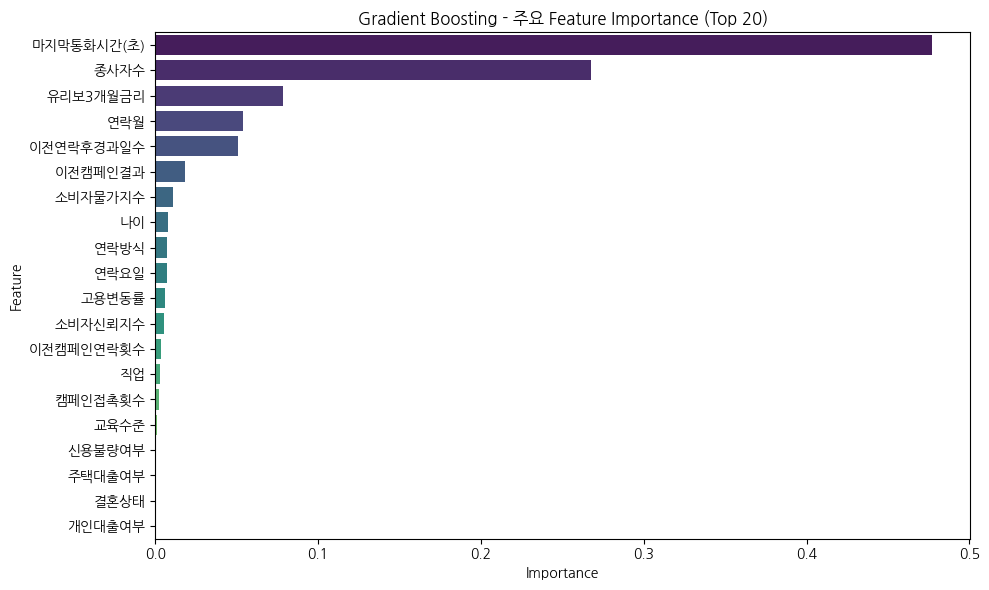

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gradient Boosting 모델 훈련
gb_model = models["Gradient Boosting"]
gb_model.fit(X_train_enc, y_train)   # 인코딩된 데이터로 훈련

# 특성 중요도 추출
importances = gb_model.feature_importances_
feature_names = X_train_enc.columns   # ← 타겟 인코딩 후 컬럼
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# 중요도 내림차순 정렬
feat_imp = feat_imp.sort_values("Importance", ascending=False).reset_index(drop=True)
print(feat_imp.head(20))   # 상위 20개 출력

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(20), palette="viridis")
plt.title("Gradient Boosting - 주요 Feature Importance (Top 20)")
plt.tight_layout()
plt.show()


* 마지막 통화시간이 가장 크게 영향을 미치는 것을 확인함

     Feature  Importance
0        연락월    0.053764
1    이전캠페인결과    0.018004
2         나이    0.007647
3       연락방식    0.007117
4       연락요일    0.006939
5  이전캠페인연락횟수    0.003765
6         직업    0.003200
7    캠페인접촉횟수    0.002182
8       교육수준    0.001189
9       결혼상태    0.000128


/tmp/ipython-input-183020746.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp_ctrl.head(20), palette="viridis")


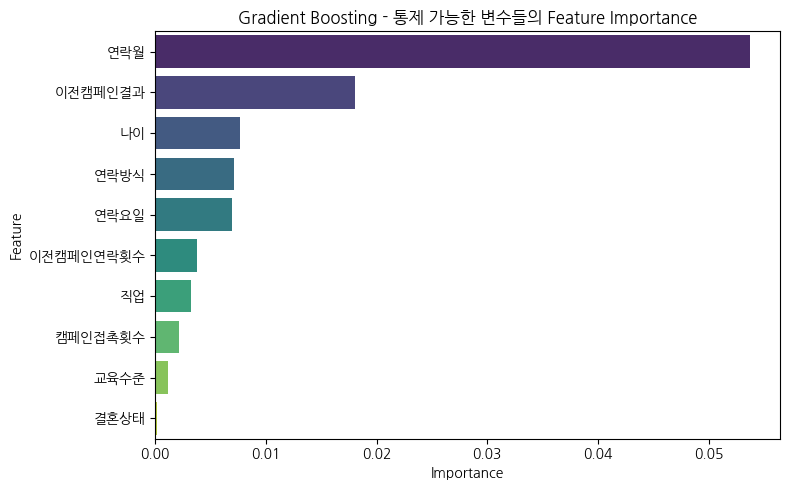

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gradient Boosting 모델 훈련
gb_model = models["Gradient Boosting"]
gb_model.fit(X_train_enc, y_train)   # 인코딩된 데이터로 훈련

# 특성 중요도 추출
importances = gb_model.feature_importances_
feature_names = X_train_enc.columns   # ← 타겟 인코딩 후 컬럼
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# -----------------------------
# 1) 통제 가능한 변수만 필터링
# -----------------------------
controllable_features = [
    "나이", "직업", "교육수준", "결혼상태",
    "연락방식", "연락월", "연락요일",
    "캠페인접촉횟수", "이전캠페인연락횟수", "이전캠페인결과"
]

feat_imp_ctrl = feat_imp[feat_imp["Feature"].isin(controllable_features)]

# 중요도 내림차순 정렬
feat_imp_ctrl = feat_imp_ctrl.sort_values("Importance", ascending=False).reset_index(drop=True)
print(feat_imp_ctrl.head(20))   # 통제 가능 변수 중 상위 20개 출력

# 시각화
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp_ctrl.head(20), palette="viridis")
plt.title("Gradient Boosting - 통제 가능한 변수들의 Feature Importance")
plt.tight_layout()
plt.show()


     Feature  Importance
0    이전캠페인결과    0.018004
1         나이    0.007647
2       연락방식    0.007117
3  이전캠페인연락횟수    0.003765
4         직업    0.003200
5    캠페인접촉횟수    0.002182
6       교육수준    0.001189
7       결혼상태    0.000128


/tmp/ipython-input-1750114399.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp_ctrl.head(20), palette="viridis")


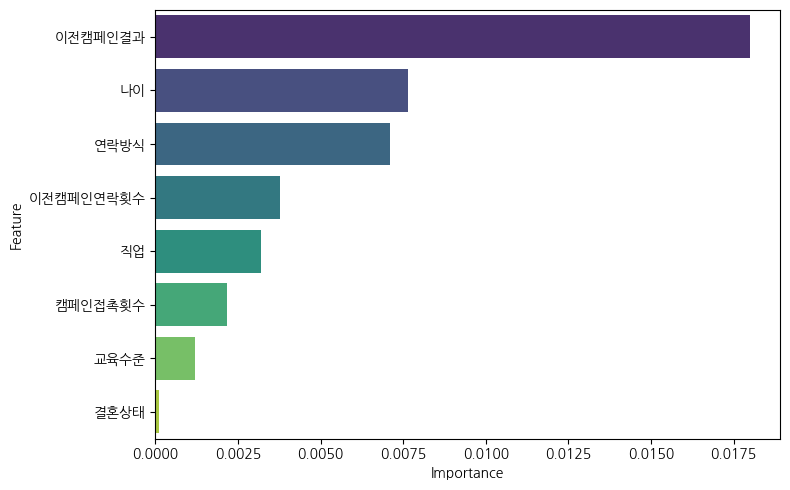

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gradient Boosting 모델 훈련
gb_model = models["Gradient Boosting"]
gb_model.fit(X_train_enc, y_train)   # 인코딩된 데이터로 훈련

# 특성 중요도 추출
importances = gb_model.feature_importances_
feature_names = X_train_enc.columns   # ← 타겟 인코딩 후 컬럼
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# -----------------------------
# 1) 통제 가능한 변수만 필터링
# -----------------------------
controllable_features = [
    "나이", "직업", "교육수준", "결혼상태",
    "연락방식",
    "캠페인접촉횟수", "이전캠페인연락횟수", "이전캠페인결과"
]

feat_imp_ctrl = feat_imp[feat_imp["Feature"].isin(controllable_features)]

# 중요도 내림차순 정렬
feat_imp_ctrl = feat_imp_ctrl.sort_values("Importance", ascending=False).reset_index(drop=True)
print(feat_imp_ctrl.head(20))   # 통제 가능 변수 중 상위 20개 출력

# 시각화
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp_ctrl.head(20), palette="viridis")
# plt.title("Gradient Boosting - 통제 가능한 변수들의 Feature Importance")
plt.tight_layout()
plt.show()


직접 조절 가능한 변수에 대해서만 모델링

In [ ]:
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

# ------------------------
# 1) 데이터 준비
# ------------------------
df_model = df.copy()
df_model["y"] = df_model["예금가입여부"].map({"yes": 1, "no": 0}).astype(int)

# 전체 Feature와 Target
X_full = df_model.drop(columns=["예금가입여부", "y"])
y = df_model["y"]

# ------------------------
# 2) 조절 가능한 변수만 선택
# (예: 나이, 직업, 교육수준, 결혼상태, 연락방식, 연락월, 연락요일, 과거 캠페인 이력)
# ------------------------
control_vars = ["나이", "직업", "교육수준", "결혼상태",
                "연락방식", "연락월", "연락요일",
                "이전캠페인연락횟수", "이전캠페인결과", "캠페인접촉횟수"]

X_control = df_model[control_vars]

# ------------------------
# 3) 데이터 분리
# ------------------------
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_control, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------
# 4) 타겟 인코딩
# ------------------------
cat_cols_f = Xf_train.select_dtypes(include=['object']).columns
num_cols_f = Xf_train.select_dtypes(exclude=['object']).columns

cat_cols_c = Xc_train.select_dtypes(include=['object']).columns
num_cols_c = Xc_train.select_dtypes(exclude=['object']).columns

# 전체 변수 인코딩
target_enc_f = ce.TargetEncoder(cols=cat_cols_f)
Xf_train_enc = target_enc_f.fit_transform(Xf_train, yf_train)
Xf_test_enc  = target_enc_f.transform(Xf_test)

# 조절 가능한 변수 인코딩
target_enc_c = ce.TargetEncoder(cols=cat_cols_c)
Xc_train_enc = target_enc_c.fit_transform(Xc_train, yc_train)
Xc_test_enc  = target_enc_c.transform(Xc_test)

# ------------------------
# 5) 스케일링
# ------------------------
scaler_f = StandardScaler()
Xf_train_enc[num_cols_f] = scaler_f.fit_transform(Xf_train_enc[num_cols_f])
Xf_test_enc[num_cols_f]  = scaler_f.transform(Xf_test_enc[num_cols_f])

scaler_c = StandardScaler()
Xc_train_enc[num_cols_c] = scaler_c.fit_transform(Xc_train_enc[num_cols_c])
Xc_test_enc[num_cols_c]  = scaler_c.transform(Xc_test_enc[num_cols_c])

# ------------------------
# 6) 모델 학습 (Gradient Boosting)
# ------------------------
model_f = GradientBoostingClassifier(random_state=42)
model_f.fit(Xf_train_enc, yf_train)

model_c = GradientBoostingClassifier(random_state=42)
model_c.fit(Xc_train_enc, yc_train)

# ------------------------
# 7) 성능 비교
# ------------------------
print("\n=== 전체 변수 포함 모델 ===")
y_pred_f = model_f.predict(Xf_test_enc)
y_proba_f = model_f.predict_proba(Xf_test_enc)[:,1]
print(classification_report(yf_test, y_pred_f))
print("ROC-AUC:", roc_auc_score(yf_test, y_proba_f))

print("\n=== 조절 가능한 변수만 모델 ===")
y_pred_c = model_c.predict(Xc_test_enc)
y_proba_c = model_c.predict_proba(Xc_test_enc)[:,1]
print(classification_report(yc_test, y_pred_c))
print("ROC-AUC:", roc_auc_score(yc_test, y_proba_c))



=== 전체 변수 포함 모델 ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.69      0.54      0.61       928

    accuracy                           0.92      8238
   macro avg       0.82      0.76      0.78      8238
weighted avg       0.92      0.92      0.92      8238

ROC-AUC: 0.9534182773951603

=== 조절 가능한 변수만 모델 ===
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.67      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238

ROC-AUC: 0.7742538710552385


* 조절 가능한 변수만 보고 비교하였을 때 성능이 좋지 않게 나타났다
  * 조절 가능한 변수 모델에서 가입자 yes의 recall이 0.21로 나타남으로써, 실제 가입자를 거의 알 수 없었다는 것을 의미

In [ ]:
import pandas as pd

# 1) 예금 미가입자(NO) 데이터만 추출
df_no = df_model[df_model["예금가입여부"] == "no"].copy()

# 2) 전처리 + 예측 함수 정의
def preprocess_and_predict(df_input, trained_model, target_enc, scaler, num_cols, cat_cols):
    df_temp = df_input.copy()

    # 타깃 제거
    if "예금가입여부" in df_temp.columns:
        df_temp = df_temp.drop(columns=["예금가입여부"], errors="ignore")
    if "y" in df_temp.columns:
        df_temp = df_temp.drop(columns=["y"], errors="ignore")

    # 타겟 인코딩 적용
    df_temp_enc = target_enc.transform(df_temp)

    # 스케일링
    df_temp_enc[num_cols] = scaler.transform(df_temp_enc[num_cols])

    # 예측 확률 반환
    return trained_model.predict_proba(df_temp_enc)[:,1]

# 3) 시나리오별 조건 수정
scenarios = {}

# (a) 나이를 30세 이하로 설정
df_s1 = df_no.copy()
df_s1["나이"] = 25
scenarios["30세 이하"] = df_s1

# (b) 나이를 65세 이상으로 설정
df_s2 = df_no.copy()
df_s2["나이"] = 70
scenarios["65세 이상"] = df_s2

# (c) 직업을 학생으로 설정
df_s3 = df_no.copy()
df_s3["나이"] = 25
df_s3["직업"] = "student"
scenarios["30세 이하 학생"] = df_s3

# (d) 직업을 은퇴자로 설정
df_s4 = df_no.copy()
df_s4["나이"] = 70
df_s4["직업"] = "retired"
scenarios["65세 이상 은퇴자"] = df_s4

# 4) 각 시나리오 예측 (Gradient Boosting 활용)
for name, df_s in scenarios.items():
    probs = preprocess_and_predict(df_s, models["Gradient Boosting"], target_enc, scaler, num_cols, cat_cols)
    print(f"{name} → 예금가입 YES 평균 예측확률: {probs.mean():.3f}")


30세 이하 → 예금가입 YES 평균 예측확률: 0.067
65세 이상 → 예금가입 YES 평균 예측확률: 0.085
30세 이하 학생 → 예금가입 YES 평균 예측확률: 0.071
65세 이상 은퇴자 → 예금가입 YES 평균 예측확률: 0.089


30세 이하를 25세로, 65세 이상을 70세로 대표값을 넣어 해당 연령과 직업일 경우, 정기 예금 가입을 하지 않았다가 하게 되는 경우 확인
 -> 문제 : 대표값을 임의로 중앙으로 선정하여 신뢰도가 떨어짐

65세 이상 은퇴자의 통화시간을 토대로, 예금 가입 YES의 비율 예측

In [ ]:
import pandas as pd

# 1) 예금 미가입자(NO) 데이터만 추출
df_no = df_model[df_model["예금가입여부"] == "no"].copy()

# 2) 전처리 + 예측 함수
def preprocess_and_predict(df_input, trained_model, target_enc, scaler, num_cols, cat_cols):
    df_temp = df_input.copy()
    if "예금가입여부" in df_temp.columns:
        df_temp = df_temp.drop(columns=["예금가입여부"], errors="ignore")
    if "y" in df_temp.columns:
        df_temp = df_temp.drop(columns=["y"], errors="ignore")

    # 타겟 인코딩
    df_temp_enc = target_enc.transform(df_temp)

    # 스케일링
    df_temp_enc[num_cols] = scaler.transform(df_temp_enc[num_cols])

    return trained_model.predict_proba(df_temp_enc)[:,1]

# 3) 결과 저장용
results = []

# (A) 통화시간만 변화 (500~1000초)
for t in range(500, 1001, 100):
    df_t = df_no.copy()
    df_t["마지막통화시간(초)"] = t
    probs_t = preprocess_and_predict(df_t, models["Gradient Boosting"], target_enc, scaler, num_cols, cat_cols)
    results.append([t, "통화시간만 변경", probs_t.mean()])

# (B) 통화시간 + 65세 은퇴자
for t in range(500, 1001, 100):
    df_t = df_no.copy()
    df_t["나이"] = 70
    df_t["직업"] = "retired"
    df_t["마지막통화시간(초)"] = t
    probs_t = preprocess_and_predict(df_t, models["Gradient Boosting"], target_enc, scaler, num_cols, cat_cols)
    results.append([t, "65세 은퇴자 + 통화시간", probs_t.mean()])

# 4) 결과 정리
df_results = pd.DataFrame(results, columns=["통화시간(초)", "조건", "예금가입 YES 평균 예측확률"])
print(df_results.pivot(index="통화시간(초)", columns="조건", values="예금가입 YES 평균 예측확률"))

# 5) ROI(1명 유치당 상담시간) 계산 추가
df_results["ROI(초/1명)"] = df_results["통화시간(초)"] / df_results["예금가입 YES 평균 예측확률"]

# 6) 피벗 형태로 보기 좋게 정리
df_pivot = df_results.pivot(index="통화시간(초)", columns="조건", values=["예금가입 YES 평균 예측확률", "ROI(초/1명)"])
print(df_pivot)





조건       65세 은퇴자 + 통화시간  통화시간만 변경
통화시간(초)                          
500            0.259081  0.180099
600            0.408662  0.291295
700            0.504810  0.382219
800            0.532673  0.407817
900            0.674406  0.554333
1000           0.673546  0.553426
        예금가입 YES 평균 예측확률                ROI(초/1명)             
조건        65세 은퇴자 + 통화시간  통화시간만 변경 65세 은퇴자 + 통화시간     통화시간만 변경
통화시간(초)                                                       
500             0.259081  0.180099    1929.898129  2776.249126
600             0.408662  0.291295    1468.206420  2059.768850
700             0.504810  0.382219    1386.659394  1831.409069
800             0.532673  0.407817    1501.858550  1961.662074
900             0.674406  0.554333    1334.506969  1623.571722
1000            0.673546  0.553426    1484.679501  1806.927443


위의 모델링 결과 시각화

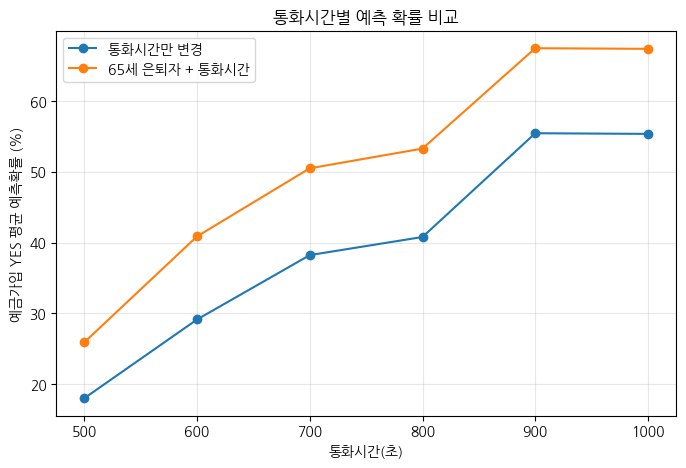

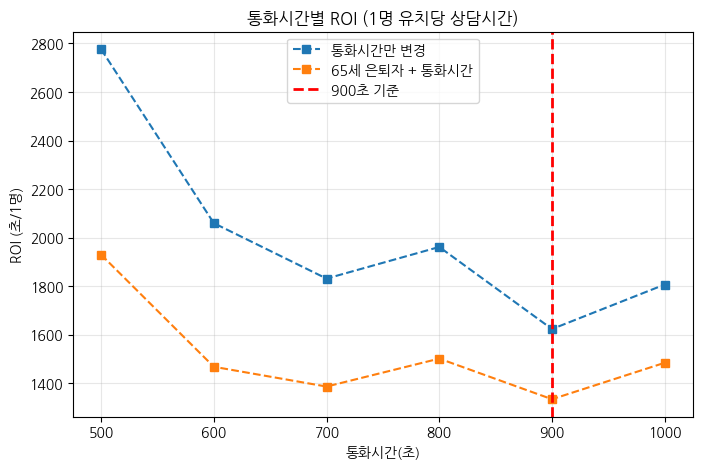

In [ ]:
import matplotlib.pyplot as plt

# 조건별 분리
cond1 = df_results[df_results["조건"] == "통화시간만 변경"]
cond2 = df_results[df_results["조건"] == "65세 은퇴자 + 통화시간"]

# ------------------------
# 1) 예측 확률 그래프
# ------------------------
plt.figure(figsize=(8,5))
plt.plot(cond1["통화시간(초)"], cond1["예금가입 YES 평균 예측확률"]*100, marker="o", label="통화시간만 변경")
plt.plot(cond2["통화시간(초)"], cond2["예금가입 YES 평균 예측확률"]*100, marker="o", label="65세 은퇴자 + 통화시간")
plt.ylabel("예금가입 YES 평균 예측확률 (%)")
plt.xlabel("통화시간(초)")
plt.title("통화시간별 예측 확률 비교")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------
# 2) ROI(1명 유치당 상담시간) 그래프
# ------------------------
# 조건별 분리
cond1 = df_results[df_results["조건"] == "통화시간만 변경"]
cond2 = df_results[df_results["조건"] == "65세 은퇴자 + 통화시간"]

plt.figure(figsize=(8,5))
plt.plot(cond1["통화시간(초)"], cond1["ROI(초/1명)"], marker="s", linestyle="--", label="통화시간만 변경")
plt.plot(cond2["통화시간(초)"], cond2["ROI(초/1명)"], marker="s", linestyle="--", label="65세 은퇴자 + 통화시간")

# 900초 수직선 추가
plt.axvline(x=900, color="red", linestyle="--", linewidth=2, label="900초 기준")

plt.ylabel("ROI (초/1명)")
plt.xlabel("통화시간(초)")
plt.title("통화시간별 ROI (1명 유치당 상담시간)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


* 통화시간이 길수록, 가입율이 높아지며, 주 타겟을 65세 이상의 은퇴자들을 위주로 통화를 돌렸을 떄, 가입을 하지 않았던 사람들의 60% 이상의 고객이 가입을 할 수 있다는 것을 알게 돠었다.
* 통화시간에 따른 ROI를 보게되면 900초 통화하였을 떄가 최적으로 나타나며, 통화시간의 조절이 어렵지만, 다음과 같은 방향을 유지하면서 진행하면 효율적일 것이라고 판단했다.

65세 은퇴자 집단에서 통화시간(500초 vs 900초)에 따른 예금가입 효과를 Propensity Score Matching으로 비교

이전 가입 여부 반영

In [ ]:
import pandas as pd

# 1) 예금 미가입자(NO) 데이터만 추출
df_no = df_model[df_model["예금가입여부"] == "no"].copy()

# 2) 전처리 + 예측 함수 정의
def preprocess_and_predict(df_input, trained_model, target_enc, scaler, num_cols, cat_cols):
    df_temp = df_input.copy()

    # 타깃 제거
    df_temp = df_temp.drop(columns=["예금가입여부","y"], errors="ignore")

    # 타겟 인코딩 적용
    df_temp_enc = target_enc.transform(df_temp)

    # 스케일링
    df_temp_enc[num_cols] = scaler.transform(df_temp_enc[num_cols])

    # 예측 확률 반환
    return trained_model.predict_proba(df_temp_enc)[:,1]

# 3) 시나리오별 조건 수정
scenarios = {}

# (a) 나이를 30세 이하로 설정
df_s1 = df_no.copy()
df_s1["나이"] = 25
scenarios["30세 이하"] = df_s1

# (b) 나이를 65세 이상으로 설정
df_s2 = df_no.copy()
df_s2["나이"] = 70
scenarios["65세 이상"] = df_s2

# (c) 직업을 학생으로 설정
df_s3 = df_no.copy()
df_s3["나이"] = 25
df_s3["직업"] = "student"
scenarios["30세 이하 학생"] = df_s3

# (d) 직업을 은퇴자로 설정
df_s4 = df_no.copy()
df_s4["나이"] = 70
df_s4["직업"] = "retired"
scenarios["65세 이상 은퇴자"] = df_s4

# (e) 이전 캠페인 성공자
df_s5 = df_no.copy()
df_s5["이전캠페인결과"] = "success"
scenarios["이전캠페인 성공자"] = df_s5

# (f) 이전 캠페인 실패자
df_s6 = df_no.copy()
df_s6["이전캠페인결과"] = "failure"
scenarios["이전캠페인 실패자"] = df_s6

# 4) 각 시나리오 예측 (Gradient Boosting 활용)
for name, df_s in scenarios.items():
    probs = preprocess_and_predict(df_s, models["Gradient Boosting"], target_enc, scaler, num_cols, cat_cols)
    print(f"{name} → 예금가입 YES 평균 예측확률: {probs.mean():.3f}")


30세 이하 → 예금가입 YES 평균 예측확률: 0.067
65세 이상 → 예금가입 YES 평균 예측확률: 0.085
30세 이하 학생 → 예금가입 YES 평균 예측확률: 0.071
65세 이상 은퇴자 → 예금가입 YES 평균 예측확률: 0.089
이전캠페인 성공자 → 예금가입 YES 평균 예측확률: 0.082
이전캠페인 실패자 → 예금가입 YES 평균 예측확률: 0.059


최종 사용 타겟 시뮬레이션 코드

In [ ]:
import pandas as pd
df_model = df.copy()

# 1) 예금 미가입자(NO) 데이터만 추출
df_no = df_model[df_model["예금가입여부"] == "no"].copy()

# 2) 전처리 + 예측 함수 정의
def preprocess_and_predict(df_input, trained_model, target_enc, scaler, num_cols, cat_cols):
    df_temp = df_input.copy()

    # 타깃 제거
    df_temp = df_temp.drop(columns=["예금가입여부","y"], errors="ignore")

    # 타겟 인코딩 적용
    df_temp_enc = target_enc.transform(df_temp)

    # 스케일링
    df_temp_enc[num_cols] = scaler.transform(df_temp_enc[num_cols])

    # 예측 확률 반환
    return trained_model.predict_proba(df_temp_enc)[:,1]

# 3) 시나리오별 조건 수정
scenarios = {}

# (a) 이전 캠페인 참여 + 30대 이하 학생
df_s1 = df_no.copy()
df_s1["나이"] = 25
df_s1["직업"] = "student"
df_s1["이전캠페인결과"] = "success"   # 참여해서 성공
scenarios["이전캠페인 성공 + 30세 이하 학생"] = df_s1

df_s2 = df_no.copy()
df_s2["나이"] = 25
df_s2["직업"] = "student"
df_s2["이전캠페인결과"] = "failure"   # 참여해서 실패
scenarios["이전캠페인 실패 + 30세 이하 학생"] = df_s2

# (b) 이전 캠페인 참여 + 65세 이상 은퇴자
df_s3 = df_no.copy()
df_s3["나이"] = 70
df_s3["직업"] = "retired"
df_s3["이전캠페인결과"] = "success"
scenarios["이전캠페인 성공 + 65세 이상 은퇴자"] = df_s3

df_s4 = df_no.copy()
df_s4["나이"] = 70
df_s4["직업"] = "retired"
df_s4["이전캠페인결과"] = "failure"
scenarios["이전캠페인 실패 + 65세 이상 은퇴자"] = df_s4

# (c) 이전 캠페인 불참여 + 30대 이하 학생
df_s5 = df_no.copy()
df_s5["나이"] = 25
df_s5["직업"] = "student"
df_s5["이전캠페인결과"] = "nonexistent"   # 참여 X (데이터셋에서 값 확인 필요!)
scenarios["이전캠페인 없음 + 30세 이하 학생"] = df_s5

# (d) 이전 캠페인 불참여 + 65세 이상 은퇴자
df_s6 = df_no.copy()
df_s6["나이"] = 70
df_s6["직업"] = "retired"
df_s6["이전캠페인결과"] = "nonexistent"
scenarios["이전캠페인 없음 + 65세 이상 은퇴자"] = df_s6

# 4) 각 시나리오 예측 (Gradient Boosting 활용)
for name, df_s in scenarios.items():
    probs = preprocess_and_predict(df_s, models["Gradient Boosting"], target_enc, scaler, num_cols, cat_cols)
    print(f"{name} → 예금가입 YES 평균 예측확률: {probs.mean():.3f}")


이전캠페인 성공 + 30세 이하 학생 → 예금가입 YES 평균 예측확률: 0.090
이전캠페인 실패 + 30세 이하 학생 → 예금가입 YES 평균 예측확률: 0.065
이전캠페인 성공 + 65세 이상 은퇴자 → 예금가입 YES 평균 예측확률: 0.116
이전캠페인 실패 + 65세 이상 은퇴자 → 예금가입 YES 평균 예측확률: 0.084
이전캠페인 없음 + 30세 이하 학생 → 예금가입 YES 평균 예측확률: 0.071
이전캠페인 없음 + 65세 이상 은퇴자 → 예금가입 YES 평균 예측확률: 0.089


In [ ]:
import pandas as pd

# ROI 결과 저장용
results = []

# 통화시간 후보 (예: 100초 ~ 900초)
call_times = [100,300,500, 700, 900]

# 각 시나리오별 ROI 계산
for name, df_s in scenarios.items():
    for t in call_times:
        df_temp = df_s.copy()
        df_temp["마지막통화시간(초)"] = t   # 통화시간 고정
        probs = preprocess_and_predict(df_temp, models["Gradient Boosting"], target_enc, scaler, num_cols, cat_cols)

        avg_prob = probs.mean()
        roi = t / avg_prob if avg_prob > 0 else None

        results.append([name, t, avg_prob, roi])

# 결과 DataFrame 정리
df_roi = pd.DataFrame(results, columns=["시나리오", "통화시간(초)", "예금가입 YES 평균 예측확률", "ROI(초/1명)"])
print("\n=== 통화시간별 ROI 결과 ===")
print(df_roi)

# 피벗 테이블 형태로 보기
df_pivot = df_roi.pivot(index="통화시간(초)", columns="시나리오", values="ROI(초/1명)")
print("\n=== ROI 피벗 테이블 ===")
print(df_pivot)



=== 통화시간별 ROI 결과 ===
                     시나리오  통화시간(초)  예금가입 YES 평균 예측확률    ROI(초/1명)
0    이전캠페인 성공 + 30세 이하 학생      100          0.028403  3520.759676
1    이전캠페인 성공 + 30세 이하 학생      300          0.103096  2909.901708
2    이전캠페인 성공 + 30세 이하 학생      500          0.260579  1918.800346
3    이전캠페인 성공 + 30세 이하 학생      700          0.524727  1334.027936
4    이전캠페인 성공 + 30세 이하 학생      900          0.695125  1294.731300
5    이전캠페인 실패 + 30세 이하 학생      100          0.021217  4713.159722
6    이전캠페인 실패 + 30세 이하 학생      300          0.073543  4079.227282
7    이전캠페인 실패 + 30세 이하 학생      500          0.187344  2668.881068
8    이전캠페인 실패 + 30세 이하 학생      700          0.393755  1777.754150
9    이전캠페인 실패 + 30세 이하 학생      900          0.566131  1589.737391
10  이전캠페인 성공 + 65세 이상 은퇴자      100          0.039570  2527.146430
11  이전캠페인 성공 + 65세 이상 은퇴자      300          0.128103  2341.862614
12  이전캠페인 성공 + 65세 이상 은퇴자      500          0.339699  1471.891634
13  이전캠페인 성공 + 65세 이상 은퇴자      700          0.617685  

In [ ]:
import pandas as pd
df_model = df.copy()

# 1) 예금 미가입자(NO) 데이터만 추출
df_no = df_model[df_model["예금가입여부"] == "no"].copy()

# 2) 전처리 + 예측 함수 정의
def preprocess_and_predict(df_input, trained_model, target_enc, scaler, num_cols, cat_cols):
    df_temp = df_input.copy()

    # 타깃 제거
    df_temp = df_temp.drop(columns=["예금가입여부","y"], errors="ignore")

    # 타겟 인코딩 적용
    df_temp_enc = target_enc.transform(df_temp)

    # 스케일링
    df_temp_enc[num_cols] = scaler.transform(df_temp_enc[num_cols])

    # 예측 확률 반환
    return trained_model.predict_proba(df_temp_enc)[:,1]

# 3) 시나리오별 조건 수정
scenarios = {}

# (a) 이전 캠페인 참여 + 30대 이하 학생
df_s1 = df_no.copy()
df_s1["나이"] = 25
df_s1["직업"] = "student"
df_s1["이전캠페인결과"] = "success"
scenarios["이전캠페인 성공 + 30세 이하 학생"] = df_s1

df_s2 = df_no.copy()
df_s2["나이"] = 25
df_s2["직업"] = "student"
df_s2["이전캠페인결과"] = "failure"
scenarios["이전캠페인 실패 + 30세 이하 학생"] = df_s2

# (b) 이전 캠페인 참여 + 65세 이상 은퇴자
df_s3 = df_no.copy()
df_s3["나이"] = 70
df_s3["직업"] = "retired"
df_s3["이전캠페인결과"] = "success"
scenarios["이전캠페인 성공 + 65세 이상 은퇴자"] = df_s3

df_s4 = df_no.copy()
df_s4["나이"] = 70
df_s4["직업"] = "retired"
df_s4["이전캠페인결과"] = "failure"
scenarios["이전캠페인 실패 + 65세 이상 은퇴자"] = df_s4

# (c) 이전 캠페인 불참여 + 30대 이하 학생
df_s5 = df_no.copy()
df_s5["나이"] = 25
df_s5["직업"] = "student"
df_s5["이전캠페인결과"] = "nonexistent"
scenarios["이전캠페인 없음 + 30세 이하 학생"] = df_s5

# (d) 이전 캠페인 불참여 + 65세 이상 은퇴자
df_s6 = df_no.copy()
df_s6["나이"] = 70
df_s6["직업"] = "retired"
df_s6["이전캠페인결과"] = "nonexistent"
scenarios["이전캠페인 없음 + 65세 이상 은퇴자"] = df_s6

# (e) 이전 캠페인 실패 + 없음 통합 (이전캠페인 X) - 30세 이하 학생
df_s7 = pd.concat([df_s2, df_s5])
scenarios["이전캠페인 X + 30세 이하 학생"] = df_s7

# (f) 이전 캠페인 실패 + 없음 통합 (이전캠페인 X) - 65세 이상 은퇴자
df_s8 = pd.concat([df_s4, df_s6])
scenarios["이전캠페인 X + 65세 이상 은퇴자"] = df_s8

# 4) 각 시나리오 예측 (Gradient Boosting 활용)
for name, df_s in scenarios.items():
    probs = preprocess_and_predict(df_s, models["Gradient Boosting"], target_enc, scaler, num_cols, cat_cols)
    print(f"{name} → 예금가입 YES 평균 예측확률: {probs.mean():.3f}")


이전캠페인 성공 + 30세 이하 학생 → 예금가입 YES 평균 예측확률: 0.090
이전캠페인 실패 + 30세 이하 학생 → 예금가입 YES 평균 예측확률: 0.065
이전캠페인 성공 + 65세 이상 은퇴자 → 예금가입 YES 평균 예측확률: 0.116
이전캠페인 실패 + 65세 이상 은퇴자 → 예금가입 YES 평균 예측확률: 0.084
이전캠페인 없음 + 30세 이하 학생 → 예금가입 YES 평균 예측확률: 0.071
이전캠페인 없음 + 65세 이상 은퇴자 → 예금가입 YES 평균 예측확률: 0.089
이전캠페인 X + 30세 이하 학생 → 예금가입 YES 평균 예측확률: 0.068
이전캠페인 X + 65세 이상 은퇴자 → 예금가입 YES 평균 예측확률: 0.087


In [ ]:
import pandas as pd

df_model = df.copy()

# 1) 예금 미가입자(NO) 데이터만 추출
df_no = df_model[df_model["예금가입여부"] == "no"].copy()

# 2) 전처리 + 예측 함수 정의
def preprocess_and_predict(df_input, trained_model, target_enc, scaler, num_cols, cat_cols):
    df_temp = df_input.copy()
    df_temp = df_temp.drop(columns=["예금가입여부","y"], errors="ignore")  # 타깃 제거
    df_temp_enc = target_enc.transform(df_temp)  # 타겟 인코딩
    df_temp_enc[num_cols] = scaler.transform(df_temp_enc[num_cols])  # 스케일링
    return trained_model.predict_proba(df_temp_enc)[:,1]  # YES 확률 반환

# 3) 시나리오별 조건 설정
scenarios = {}

# (a) 이전 캠페인 참여 + 30대 이하 학생
df_s1 = df_no.copy(); df_s1["나이"] = 25; df_s1["직업"] = "student"; df_s1["이전캠페인결과"] = "success"
scenarios["이전캠페인 성공 + 30세 이하 학생"] = df_s1

df_s2 = df_no.copy(); df_s2["나이"] = 25; df_s2["직업"] = "student"; df_s2["이전캠페인결과"] = "failure"
scenarios["이전캠페인 실패 + 30세 이하 학생"] = df_s2

# (b) 이전 캠페인 참여 + 65세 이상 은퇴자
df_s3 = df_no.copy(); df_s3["나이"] = 70; df_s3["직업"] = "retired"; df_s3["이전캠페인결과"] = "success"
scenarios["이전캠페인 성공 + 65세 이상 은퇴자"] = df_s3

df_s4 = df_no.copy(); df_s4["나이"] = 70; df_s4["직업"] = "retired"; df_s4["이전캠페인결과"] = "failure"
scenarios["이전캠페인 실패 + 65세 이상 은퇴자"] = df_s4

# (c) 이전 캠페인 불참여
df_s5 = df_no.copy(); df_s5["나이"] = 25; df_s5["직업"] = "student"; df_s5["이전캠페인결과"] = "nonexistent"
scenarios["이전캠페인 없음 + 30세 이하 학생"] = df_s5

df_s6 = df_no.copy(); df_s6["나이"] = 70; df_s6["직업"] = "retired"; df_s6["이전캠페인결과"] = "nonexistent"
scenarios["이전캠페인 없음 + 65세 이상 은퇴자"] = df_s6

# (d) 실패 + 없음 통합 (이전캠페인 X)
scenarios["이전캠페인 X + 30세 이하 학생"] = pd.concat([df_s2, df_s5])
scenarios["이전캠페인 X + 65세 이상 은퇴자"] = pd.concat([df_s4, df_s6])

# 4) ROI 계산
results = []
call_times = [100, 300, 500, 700, 900]

for name, df_s in scenarios.items():
    for t in call_times:
        df_temp = df_s.copy()
        df_temp["마지막통화시간(초)"] = t  # 통화시간 고정

        probs = preprocess_and_predict(df_temp, models["Gradient Boosting"], target_enc, scaler, num_cols, cat_cols)
        avg_prob = probs.mean()
        roi = t / avg_prob if avg_prob > 0 else None

        results.append([name, t, avg_prob, roi])

# 5) 결과 DataFrame 정리
df_roi = pd.DataFrame(results, columns=["시나리오", "통화시간(초)", "예금가입 YES 평균 예측확률", "ROI(초/1명)"])
print("\n=== 통화시간별 ROI 결과 ===")
print(df_roi)

# 피벗 테이블로 정리
df_pivot = df_roi.pivot(index="통화시간(초)", columns="시나리오", values="ROI(초/1명)")
print("\n=== ROI 피벗 테이블 ===")
print(df_pivot)



=== 통화시간별 ROI 결과 ===
                     시나리오  통화시간(초)  예금가입 YES 평균 예측확률    ROI(초/1명)
0    이전캠페인 성공 + 30세 이하 학생      100          0.028403  3520.759676
1    이전캠페인 성공 + 30세 이하 학생      300          0.103096  2909.901708
2    이전캠페인 성공 + 30세 이하 학생      500          0.260579  1918.800346
3    이전캠페인 성공 + 30세 이하 학생      700          0.524727  1334.027936
4    이전캠페인 성공 + 30세 이하 학생      900          0.695125  1294.731300
5    이전캠페인 실패 + 30세 이하 학생      100          0.021217  4713.159722
6    이전캠페인 실패 + 30세 이하 학생      300          0.073543  4079.227282
7    이전캠페인 실패 + 30세 이하 학생      500          0.187344  2668.881068
8    이전캠페인 실패 + 30세 이하 학생      700          0.393755  1777.754150
9    이전캠페인 실패 + 30세 이하 학생      900          0.566131  1589.737391
10  이전캠페인 성공 + 65세 이상 은퇴자      100          0.039570  2527.146430
11  이전캠페인 성공 + 65세 이상 은퇴자      300          0.128103  2341.862614
12  이전캠페인 성공 + 65세 이상 은퇴자      500          0.339699  1471.891634
13  이전캠페인 성공 + 65세 이상 은퇴자      700          0.617685  

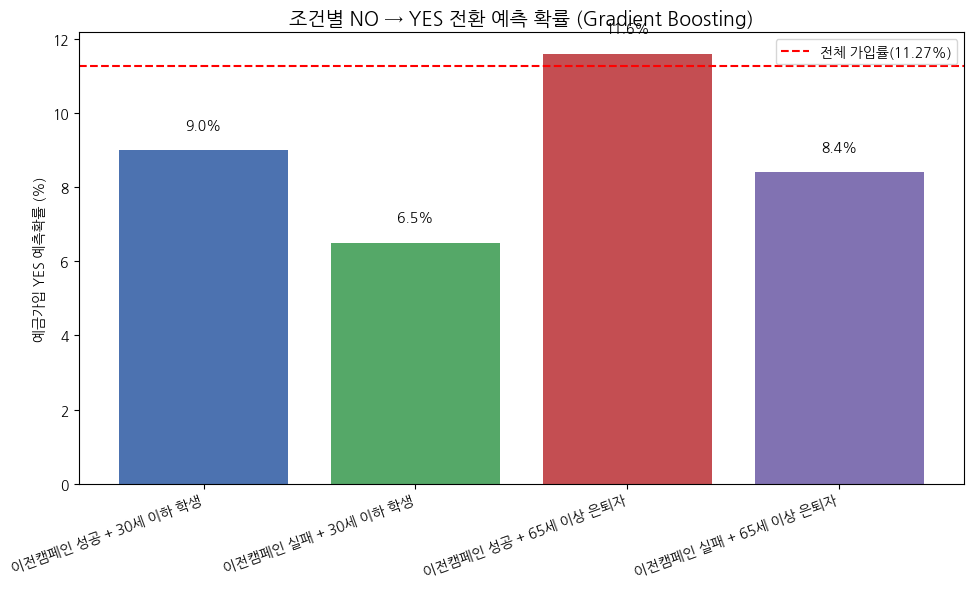

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 결과를 DataFrame으로 정리
data = {
    "조건": [
        "이전캠페인 성공 + 30세 이하 학생",
        "이전캠페인 실패 + 30세 이하 학생",
        "이전캠페인 성공 + 65세 이상 은퇴자",
        "이전캠페인 실패 + 65세 이상 은퇴자"
    ],
    "예금가입 YES 평균 예측확률": [0.090, 0.065, 0.116, 0.084]
}

df_results = pd.DataFrame(data)

# %로 변환 (보기 편하게)
df_results["예금가입 YES 평균 예측확률(%)"] = df_results["예금가입 YES 평균 예측확률"] * 100

# 막대그래프
plt.figure(figsize=(10,6))
bars = plt.bar(df_results["조건"], df_results["예금가입 YES 평균 예측확률(%)"], color=["#4C72B0","#55A868","#C44E52","#8172B2"])

# 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+0.5, f"{height:.1f}%", ha="center", va="bottom", fontsize=10)

# 기준선 (전체 평균 가입률 11.27%)
plt.axhline(y=11.27, color="red", linestyle="--", label="전체 가입률(11.27%)")

plt.title("조건별 NO → YES 전환 예측 확률 (Gradient Boosting)", fontsize=14)
plt.ylabel("예금가입 YES 예측확률 (%)")
plt.xticks(rotation=20, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


65세 은퇴자를 기준으로 이전 가입자와 비가입자의 예측 결과

In [ ]:
import matplotlib.pyplot as plt

# ------------------------
# 데이터 준비
# ------------------------
df_comp_plot = df_comp.copy()
df_comp_plot["이전가입"] = ["O", "X"]  # success=O, failure=X 순서 맞추기
df_comp_plot = df_comp_plot.sort_values("이전가입")  # 순서 정렬

# ------------------------
# 1) 예측 확률 그래프
# ------------------------
plt.figure(figsize=(6,4))
bars = plt.bar(df_comp_plot["이전가입"], df_comp_plot["예금가입 YES 평균 예측확률"]*100,
               color=["orange","skyblue"])
plt.ylabel("예금가입 YES 평균 예측확률 (%)")
plt.title("65세 은퇴자 + 900초 기준: 이전가입 여부별 비교")

# 막대 위에 수치 표시
for bar, val in zip(bars, df_comp_plot["예금가입 YES 평균 예측확률"]*100):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1,
             f"{val:.1f}%", ha="center", va="bottom", fontsize=10)
plt.show()

# ------------------------
# 2) ROI 그래프
# ------------------------
plt.figure(figsize=(6,4))
bars = plt.bar(df_comp_plot["이전가입"], df_comp_plot["ROI(초/1명)"],
               color=["orange","skyblue"])
plt.ylabel("ROI (초/1명)")
plt.title("65세 은퇴자 + 900초 기준: ROI 비교")

# 막대 위에 수치 표시
for bar, val in zip(bars, df_comp_plot["ROI(초/1명)"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+20,
             f"{val:.0f}", ha="center", va="bottom", fontsize=10)
plt.show()


NameError: name 'df_comp' is not defined

# 추가 모델링 : 마지막 연락 시간을 종속변수로 하여 영향을 미치는 변수가 어떤것이 있는 지 확인

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import category_encoders as ce
from sklearn.preprocessing import StandardScaler


# ------------------------
# 1) 데이터 준비
# ------------------------
df_reg = df.copy()

# 타깃 변수: 마지막 통화시간(초)
y = df_reg["마지막통화시간(초)"]
X = df_reg.drop(columns=["마지막통화시간(초)", "예금가입여부"])  # 분류 타깃 제거

# ------------------------
# 2) 범주형 인코딩 + 수치형 스케일링
# ------------------------
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

# 타겟 인코딩
target_enc = ce.TargetEncoder(cols=cat_cols)
X_enc = target_enc.fit_transform(X, y)

# 스케일링
scaler = StandardScaler()
X_enc[num_cols] = scaler.fit_transform(X_enc[num_cols])

# ------------------------
# 3) 데이터 분리
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.2, random_state=42
)

# ------------------------
# 4) 모델 정의
# ------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR()
}

# ------------------------
# 5) 학습 & 평가 (RMSE)
# ------------------------
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} → RMSE: {rmse:.2f}")


| Model             | RMSE   |
| ----------------- | ------ |
| Gradient Boosting | 255.83 |
| Linear Regression | 257.26 |
| Random Forest     | 273.37 |
| SVM               | 270.58 |
| KNN               | 281.98 |
| Decision Tree     | 394.53 |


* gradient Boosting이 가장 효과적이다

gradient Boosting에서 마지막 통화시간(초)에 영향을 많이 끼치는 데이터 확인 (Feature Importance)

In [ ]:
# ------------------------
# Gradient Boosting 중요 변수 확인
# ------------------------
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# 중요도 추출
importances = gb_model.feature_importances_
feature_names = X_enc.columns
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("\n=== Gradient Boosting - 주요 변수 중요도 (Top 10) ===")
print(feat_imp.head(10))

# 시각화 (상위 10개 변수)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10), palette="viridis")
plt.title("Gradient Boosting - 주요 Feature Importance (Top 10)")
plt.tight_layout()
plt.show()


shap로 확인

In [ ]:
import shap

# SHAP Explainer
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# 전체 중요도 + 방향성 (summary_plot)
shap.summary_plot(shap_values, X_test, plot_type="dot")


# 고객 이탈 방지 방법

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, mannwhitneyu

# 1) 이전 캠페인 성공자만 추출
df_success_prev = df[df["이전캠페인결과"]=="success"].copy()

# 2) 집단 분리 (이번 예금가입여부 기준)
df_yes = df_success_prev[df_success_prev["예금가입여부"]=="yes"]
df_no  = df_success_prev[df_success_prev["예금가입여부"]=="no"]

# 3) 변수 구분
cat_vars = ["연락월", "연락요일", "직업", "교육수준", "결혼상태",
            "신용불량여부", "주택대출여부", "개인대출여부", "연락방식"]
num_vars = ["캠페인접촉횟수", "마지막통화시간(초)", "나이",
            "이전연락후경과일수", "이전캠페인연락횟수",
            "고용변동률", "소비자물가지수", "소비자신뢰지수",
            "유리보3개월금리", "종사자수"]

results = []

# 4) 범주형 변수 비교 (카이제곱 검정)
for col in cat_vars:
    if df_success_prev[col].nunique() > 1:
        contingency = pd.crosstab(df_success_prev[col], df_success_prev["예금가입여부"])
        chi2, p, _, _ = chi2_contingency(contingency)
        results.append([col, "카이제곱", p])

# 5) 수치형 변수 비교 (Mann-Whitney U 검정)
for col in num_vars:
    yes_vals = df_yes[col].dropna()
    no_vals  = df_no[col].dropna()
    if len(yes_vals) > 0 and len(no_vals) > 0:
        stat, p = mannwhitneyu(yes_vals, no_vals, alternative="two-sided")
        results.append([col, "Mann-Whitney U", p])

# 6) 결과 정리
df_test_results = pd.DataFrame(results, columns=["변수", "검정 방법", "p-value"])
df_test_results["유의미 여부(0.05기준)"] = df_test_results["p-value"] < 0.05

# 7) 수치형 변수 평균 비교
num_summary = pd.DataFrame([
    {"변수": col,
     "YES 평균": df_yes[col].mean(),
     "NO 평균": df_no[col].mean()}
    for col in num_vars if col in df_success_prev.columns
])

# -------------------------
# 최종 출력
# -------------------------

print("\n=== 집단 차이 검정 결과 (p-value) ===")
print(df_test_results.sort_values("p-value"))

print("\n=== 수치형 변수 YES vs NO 평균 비교 ===")
print(num_summary.set_index("변수"))

print("\n=== 범주형 변수 YES vs NO 분포(비율) ===")
for col in cat_vars:
    if col in df_success_prev.columns:
        print(f"\n▶ {col}")
        print(pd.crosstab(df_success_prev[col],
                          df_success_prev["예금가입여부"],
                          normalize="columns").round(3))


# 결론

65세 이상의 은퇴자를 위한 예끔아이템을 만들어, 해당 연령들을 위한 서비스를 제공해주며, 통화를 통해 900초의 시간동안 이해를 시킬 수 있게, 자세한 설명을 통해 텔레마케팅을 진행한다면, 효율적으로 시간도 운영할 수 있고, 가입자의 수를 늘릴 수 있을 것이다

30세 미만의 경우에 청년 혜택 예금을 만들어 위와 같이 진행하면 효율적인 진행이 될 것이다

| 계층                      | 실제 사례 + 성과 지표                                                                                                                                                                                                                                     | 전략적 제언 (너의 분석 결과와 결합)                                                                                                                                                                                                                             |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **① 참여자 + 30세 이하 학생**   | **사례: 청년도약계좌**<br>- 출시 1년 만에 **133만 명 가입** → 가입요건 충족 청년(약 600만 명) 중 **5명 중 1명** 계약됨. ([금융위원회][1]) <br>- 1년 유지율 약 **90%** 유지됨 (일반적금 1년 만기 유지율 약 45%) ([금융위원회][1]) <br>- 저소득 청년 비중도 높음: 가입자의 약 \*\*54.5%\*\*가 연 소득 2,400만원 이하 청년층 ([KDI 경제정보센터][2]) | **너의 분석 결과**: 이 계층에서 NO→YES 전환 확률 및 ROI 절감 크기가 큼 (예: 이전 캠페인 경험자 + 30세 이하 학생 → 높은 전환 확률) <br>→ **전략**: 청년도약계좌 같은 상품을 텔레마케팅 타겟으로 활용하되, 이 참여자 그룹에게 할인 조건, 인증 절차 간소화, 가입 유지 인센티브 강조 <br>→ **메시지**: “이미 금융접점을 가진 청년, 정부 기여 및 세제혜택 포함 시 ROI 개선가능성 확인됨.” |
| **② 참여자 + 65세 이상 은퇴자**  | **사례: 고령자 우대 정기예금 상품 증가 추세**<br>- 여러 은행에서 “고령자 우대금리 예금” 상품 출시 (만 60\~65세 이상 대상), 우대금리 + 연금계좌 연계 + 비대면 가입 혜택 포함됨 ([찬이의 지식백과][3]) <br>- 예: 하나저축은행 ‘하나더넥스트 시니어 회전예금’ – 만 50세 이상, 3년 운용 가능, 매년 자동 연장, 비대면 조건 우대금리 제공됨 ([매일일보][4])                     | **너의 분석 결과**: 이 계층에서도 참여자 그룹의 ROI 절감 크기가 제일 큼 <br>→ **전략**: 고령 은퇴자 기존 참여자에게 “안정성 + 신뢰성 강조 + 창구·전화 상담 우대” 메시지를 강화 <br>→ 추가로 “우대금리 + 연금 계좌 자동 연계 + 수수료 면제” 등을 패키지로 제공, 유지 인센티브 (장기 보유 이익 강조) 포함                                                     |
| **③ 비참여자 + 30세 이하 학생**  | **사례: 청년도약계좌 등 청년 정책이 신규 유입 많이 일어나고 있음**<br>- 비참여자라도 청년도약계좌 출시 전후 광고/홍보 강화를 통해 많은 신규 청년 유입됨. 가입자 중 기존 금융상품 미참여 청년 비중 상당함 (“소득구간별 분포” 보고서 참고) ([국회예산정책처][5]) <br>- 정부가 정책 초기에 “홍보 캠페인” 및 “원스톱 금융 상담센터” 등을 도입 → 학생들의 금융 경험 문턱 낮춤 ([금융위원회][1])       | **너의 분석 결과**: 비참여자 + 학생 그룹에서도 NO→YES 전환 가능성이 존재함 (ROI 절감 있음) <br>→ **전략**: 신규 유입 중심으로 간편가입 + 학생 인증 + 체험형 혜택 (첫 달 혜택/무료증정) 제공 <br>→ “입학/학기 시작/장학금 지급 시점” 타이밍 마케팅 <br>→ 디지털/모바일 중심 광고 + 학생 커뮤니티 제휴 활용                                               |
| **④ 비참여자 + 65세 이상 은퇴자** | **사례: 고령자 우대예금의 비대면 채널 확대와 우대조건 강조**<br>- 위 글에 따르면 비대면 가입 우대금리를 제공하는 실버 예금 상품이 늘고 있고, 고령층의 안정성 요구 증가로 우대금리+조건 단순화 상품이 증가 추세임. ([찬이의 지식백과][6]) <br>- 예: 하나저축은행 회전예금처럼 “자동 연장 가능 + 중도해지 시 불이익 최소화” 옵션 있는 상품 출시됨. ([매일일보][4])                        | **너의 분석 결과**: 이 계층에서도 비참여자 그룹의 ROI 절감 있음 → 신규 고객 유치를 위해 가능성이 있음 <br>→ **전략**: 고령 신규 고객 대상 간단 가입 + 연금 수령자 인증 우대 + 안정성 강조 메시지 <br>→ 오프라인 서비스 + 상담원 지원 강화를 포함, 신뢰 확보 중심 커뮤니케이션 (예금자보호 제도 강조, 금융기관 안정성 등)                                             |

[1]: https://www.fsc.go.kr/no010101/82720?curPage=2&srchBeginDt=&srchCtgry=&srchEndDt=&srchKey=&srchText=&utm_source=chatgpt.com "보도자료 - 청년도약계좌 성과와 향후 운영방향"
[2]: https://eiec.kdi.re.kr/policy/domesticView.do?ac=0000195729&issus=O&pg=&pp=&utm_source=chatgpt.com "청년도약계좌 추진현황과 개선과제 | 국내연구자료"
[3]: https://321cba.tistory.com/entry/%EA%B3%A0%EB%A0%B9%EC%9E%90-%EC%9A%B0%EB%8C%80%EA%B8%88%EB%A6%AC-%EC%98%88%EA%B8%88-%EC%83%81%ED%92%88-%EB%B9%84%EA%B5%90-%EC%B4%9D%EC%A0%95%EB%A6%AC%EF%BD%9C%EC%8B%A0%EA%B3%A0%EB%B0%A9%EB%B2%95-%EA%B3%84%EC%82%B0-%EB%8C%80%EC%83%81-%ED%99%98%EA%B8%89-%EC%84%B8%EC%9C%A8%EA%B9%8C%EC%A7%80-%ED%95%9C%EB%88%88%EC%97%90?utm_source=chatgpt.com "고령자 우대금리 예금 상품 비교 총정리｜신고방법, 계산, 대상 ..."
[4]: https://www.m-i.kr/news/articleView.html?idxno=1252557&utm_source=chatgpt.com "하나저축은행, 뉴시니어 맞춤 회전 예금 출시"
[5]: https://nabo.go.kr/q/00aYZOf5?utm_source=chatgpt.com "'[NABO Focus 제112호] 청년도약계좌 추진현황과 개선과제 ..."
[6]: https://321cba.tistory.com/entry/2025%EB%85%84-%EA%B3%A0%EB%A0%B9%EC%9E%90-%EC%9A%B0%EB%8C%80-%EC%A0%95%EA%B8%B0%EC%98%88%EA%B8%88-%EC%B4%9D%EC%A0%95%EB%A6%AC-%EC%9D%B4%EC%9E%90%EC%9C%A8-%EB%86%92%EC%9D%80-%EC%88%9C%EC%9C%BC%EB%A1%9C-%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0?utm_source=chatgpt.com "2025년 고령자 우대 정기예금 총정리: 이자율 높은 순으로 알아 ..."
